# Variable corrolation

The following conditions apply:

 - env = biomass_zonal
 - data merged_slats_field_agb_dp1_start.csv

In [5]:

%matplotlib inline
import sklearn
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
from random import sample
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.ensemble import ExtraTreesRegressor as etr
from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import AdaBoostRegressor as abr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
# import plotting and stats modules

import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
from random import randint 

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
# from bokeh.plotting import figure, show
# from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


from sklearn.model_selection import cross_validate
#sklearn.model_selection.cross_validate
# from sklearn import cross_validation
from sklearn.metrics import explained_variance_score
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
import pickle as Pickle

In [6]:

%matplotlib inline

# import plotting and stats modules
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy
import scipy.stats as sc
import numpy as np
from glob import glob
import pandas as pd

# stats module
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Set option to display floating-point numbers without scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from bokeh.io import output_notebook, output_file
from bokeh.plotting import figure, show, save
#%matplotlib inline

# Bokeh Libraries
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool

from sklearn.model_selection import train_test_split




### Import data

In [7]:
drive = "D"
date = "20240426"

In [8]:
#csv_file = r"F:\cdu\data\zonal_stats\output\merged_slats_field_nt_mosaic_clean_start_all_values.csv"
#csv_file = r"E:\cdu\data\zonal_stats\output\merged_slats_field_agb_dp1_start.csv"
#csv_file = r"{0}:\cdu\data\zonal_stats\output\{1}\dja_dbi_dim_dis_dka_stc_h99a2_fpca2_dry_indicies_clean.csv".format(drive, date)
csv_file = r"{0}:\cdu\data\latest_biomass_data\20240402\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv".format(drive)

In [9]:
csv_file = r"C:\Users\robot\projects\cdu\biomass\dp1_dbi_si_dry_mask_density_near_met_si_fire.csv"

## Set output file locations

In [10]:
output = r"{0}:\cdu\data\zonal_stats\output\{1}".format(drive, date)
output_ = os.path.join(output, "plots")

In [11]:
if not os.path.isdir(output):
    os.mkdir(output)
if not os.path.isdir(output_):
    os.mkdir(output_)

In [12]:
# read as dataframe and copy
df1 = pd.read_csv(csv_file, header=0) # the first row is read in as the header for you columns
print(df1.shape) # prints out the number of rows and columns in your csv file 
print(list(df1))
df1.shape
df2 = df1.copy()

(190, 291)
['uid', 'site_clean', 'date', 'lon_gda94', 'lat_gda94', 'bio_l_kg1ha', 'bio_t_kg1ha', 'bio_b_kg1ha', 'bio_w_kg1ha', 'bio_br_kg1ha', 'bio_s_kg1ha', 'bio_r_kg1ha', 'bio_agb_kg1ha', 'c_l_kg1ha', 'c_t_kg1ha', 'c_b_kg1ha', 'c_w_kg1ha', 'c_br_kg1ha', 'c_s_kg1ha', 'c_r_kg1ha', 'c_agb_kg1ha', 'geometry', 'basal_dt', 'im_date', 'band', 'fire_count', 'fire_min', 'fire_max', 'fire_mean', 'fire_sum', 'fire_std', 'fire_med', 'fire_major', 'fire_minor', 'jan', 'feb', 'mar', 'april', 'may', 'june', 'july', 'aug', 'sep', 'oct', 'nov', 'dec', 's_date', 'e_date', 'image_s_dt', 'image_e_dt', 'area_ha', 'jan_per', 'feb_per', 'mar_per', 'april_per', 'may_per', 'june_per', 'july_per', 'aug_per', 'sep_per', 'oct_per', 'nov_per', 'dec_per', 'burnt_enco', 'burnt_cat', 'fire_sn_ord', 'fire_sn_cat', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'year', 'tot_an_emsi_avg', 'tot_an_emsi_avg_R', 'tot_an_emsi_avg_si', 'emsi_dt', 'tot_an_drsi_avg', 'tot_an_

In [13]:
df = df2.rename(columns={'bio_agb_kg1ha': 'target'})

In [14]:
df

,uid,site_clean,date,lon_gda94,lat_gda94,bio_l_kg1ha,bio_t_kg1ha,bio_b_kg1ha,bio_w_kg1ha,bio_br_kg1ha,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
0,1,agb02.2012,20120417,131.01,-12.65,0.00,0.00,0.00,0.00,0.00,...,-1538462.00,1538462.00,1964774.00,-383207.00,1409000.00,2022182.00,1205000.00,2336781.00,4405850.00,6047316.00
1,2,amg01.2012,20120619,134.05,-16.38,413.63,448.55,1310.22,3748.31,2886.44,...,-1341991.00,1341991.00,2881356.00,-338983.00,1438000.00,2197130.00,1283000.00,2534571.00,4947937.00,7201101.00
2,3,amg03.2012,20120620,134.03,-16.78,0.00,0.00,0.00,0.00,0.00,...,-2629287.00,2629287.00,1429988.00,-1452928.00,1629000.00,1787156.00,1146000.00,2030475.00,3306405.00,4099401.00
3,4,amg05.2012,20120621,134.09,-16.73,833.61,906.46,3541.75,11522.38,8737.57,...,-1173184.00,1173184.00,2241024.00,-539075.00,1088000.00,1753382.00,983000.00,2111557.00,4957136.00,7222079.00
4,5,amg06.2012,20120621,134.09,-16.69,104.28,113.39,443.05,1441.38,1093.02,...,-1255729.00,1255729.00,2197205.00,-836979.00,1094000.00,1668140.00,957000.00,1997912.00,4379863.00,5995724.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,184,wh07.2012,20120725,130.86,-17.73,8.12,8.83,34.49,112.20,85.08,...,-1751216.00,1751216.00,-653378.00,-1646321.00,1345000.00,1214483.00,841000.00,1367776.00,1991475.00,2236580.00
186,185,wh08.2012,20120725,130.86,-17.80,0.00,0.00,0.00,0.00,0.00,...,-1711085.00,1711085.00,742810.00,-791061.00,1523000.00,1587738.00,1080000.00,1777875.00,2626459.00,3085874.00
187,186,wh09.2012,20120725,130.83,-17.85,0.00,0.00,0.00,0.00,0.00,...,-1939035.00,1939035.00,2065458.00,-545833.00,1776000.00,1952017.00,1318000.00,2163493.00,3185114.00,3909535.00
188,187,wh13.2012,20120726,130.98,-17.48,0.00,0.00,0.00,0.00,0.00,...,-1670989.00,1670989.00,1488840.00,-458342.00,1218000.00,1131930.00,767000.00,1290232.00,1958131.00,2194196.00


## Main only

In [15]:
#main only
var_ = "main_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

In [16]:
df2

,site_clean,target,fire_mean,fire_major,rain_d_mean,et_ma_mean,tmax_mean,tmin_mean,rh_tmax_mean,rh_tmin_mean,...,b1_ccw_dry_mean,b1_dbifm_dry_mean,b1_dp1fm_dry_mean,b2_dp1fm_dry_mean,b3_dp1fm_dry_mean,b2_dbifm_dry_mean,b3_dbifm_dry_mean,b4_dbifm_dry_mean,b5_dbifm_dry_mean,b6_dbifm_dry_mean
0,agb02.2012,0.00,0.00,0.00,0.00,2.00,35.60,22.30,3319.00,3368.30,...,68.00,373.67,10.67,44.33,43.67,561.00,765.67,1970.00,2127.00,1323.67
1,amg01.2012,8376.22,10.00,10.00,0.00,0.10,27.00,9.10,3294.40,3331.90,...,66.00,292.44,11.22,32.22,55.22,500.78,655.89,1938.89,2074.78,1071.33
2,amg03.2012,0.00,10.00,10.00,0.00,0.20,26.90,6.70,3296.00,3346.80,...,6.92,412.33,3.08,4.83,90.42,677.25,1160.92,2306.50,3090.50,1729.75
3,amg05.2012,24670.80,9.75,10.00,0.00,0.70,27.30,5.50,3301.90,3376.50,...,54.75,223.58,8.75,37.25,52.75,395.83,500.67,1483.50,1652.17,940.25
4,amg06.2012,3086.16,5.00,5.00,0.00,0.70,27.30,5.60,3302.10,3376.50,...,48.33,259.56,5.22,33.78,59.44,477.00,614.67,1571.89,1858.22,1005.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,wh07.2012,240.24,0.00,0.00,0.00,0.30,30.20,9.20,3298.60,3358.20,...,2.25,738.67,35.33,5.75,57.50,1187.67,1691.17,2532.92,3530.42,2886.00
186,wh08.2012,0.00,0.00,0.00,0.00,0.30,30.10,9.10,3298.50,3357.90,...,21.25,692.08,30.33,19.67,48.42,1073.92,1516.33,2596.75,3042.00,2237.25
187,wh09.2012,0.00,0.00,0.00,0.00,0.30,30.00,9.00,3298.40,3357.60,...,14.22,582.56,1.78,15.67,81.11,952.56,1410.00,2728.56,3043.56,1794.67
188,wh13.2012,0.00,0.00,0.00,0.00,0.10,30.00,12.40,3297.20,3337.70,...,11.00,710.88,21.38,2.50,74.56,1124.31,1575.38,2342.94,2567.38,1735.06


### Logical selection

In [17]:
df2 =df[['site_clean', 
 'target', 
 'fire_count', 
 'fire_min', 
 'fire_max', 
 'fire_mean', 
 'fire_sum', 
 'fire_std', 
 'fire_med', 
 'fire_major', 
 'fire_minor', 
 'jan', 
 'feb', 
 'mar', 
 'april', 
 'may', 
 'june', 
 'july', 
 'aug', 
 'sep', 
 'oct', 
 'nov', 
 'dec', 
  'jan_per', 
 'feb_per', 
 'mar_per', 
 'april_per', 
 'may_per', 
 'june_per', 
 'july_per', 
 'aug_per',
 'sep_per', 
 'oct_per', 
 'nov_per', 
 'dec_per', 
 'burnt_enco', 
 'burnt_cat', 
 'fire_sn_ord', 
 'fire_sn_cat', 
 'fire_f', 
 'fire_tot', 
 'since_fire', 
 'fire_gap', 
 'fire_pois1_2', 
 'fire_pois1_5', 
 'fire_pois1_10', 
 'tot_an_emsi_avg', 
 'tot_an_emsi_avg_R', 
 'tot_an_emsi_avg_si', 
 'emsi_dt', 
 'tot_an_drsi_avg', 
 'tot_an_drsi_avg_R', 
 'tot_an_drsi_avg_si', 
 'drsi_dt', 
 'tot_avg_emse_djf', 
 'tot_avg_emse_mam', 
 'tot_avg_emse_jja', 
 'tot_avg_emse_son', 
 'tot_avg_emse_dry', 
 'tot_avg_emse_wet', 
 'tot_avg_emse_annual', 
 'emse_dt', 
 'tot_avg_drse_djf', 
 'tot_avg_drse_mam', 
 'tot_avg_drse_jja', 
 'tot_avg_drse_son', 
 'tot_avg_drse_dry', 
 'tot_avg_drse_wet', 
 'tot_avg_drse_annual', 
 'drse_dt', 
 'rain_d_mean', 
 'et_ma_mean', 
 'tmax_mean', 
 'tmin_mean', 
 'rh_tmax_mean', 
 'rh_tmin_mean', 
 'b1_wfp_dry_min', 
 'b1_wfp_dry_max', 
 'b1_wfp_dry_mean', 
 'b1_wfp_dry_std', 
 'b1_wfp_dry_med', 
 'b1_wfp_dry_p25', 
 'b1_wfp_dry_p50', 
 'b1_wfp_dry_p75', 
 'b1_wfp_dry_p95', 
 'b1_wfp_dry_p99', 
 'b1_wdc_dry_major', 
 'b1_wdc_dry_minor', 
 'b1_n17_dry_major', 
 'b1_n17_dry_minor', 
 'b1_hsd_min', 
 'b1_hsd_max', 
 'b1_hsd_mean', 
 'b1_hsd_std', 
 'b1_hsd_med', 
 'b1_hsd_p25', 
 'b1_hsd_p50', 
 'b1_hsd_p75', 
 'b1_hsd_p95', 
 'b1_hsd_p99', 
 'b1_hmc_min', 
 'b1_hmc_max', 
 'b1_hmc_mean', 
 'b1_hmc_std', 
 'b1_hmc_med', 
 'b1_hmc_p25', 
 'b1_hmc_p50', 
 'b1_hmc_p75', 
 'b1_hmc_p95', 
 'b1_hmc_p99', 
 'b1_hcv_min', 
 'b1_hcv_max', 
 'b1_hcv_mean', 
 'b1_hcv_std', 
 'b1_hcv_med', 
 'b1_hcv_p25', 
 'b1_hcv_p50', 
 'b1_hcv_p75', 
 'b1_hcv_p95', 
 'b1_hcv_p99', 
 'hcv_dt', 
 'b1_h99_min', 
 'b1_h99_max', 
 'b1_h99_mean', 
 'b1_h99_std', 
 'b1_h99_med', 
 'b1_h99_p25',
 'b1_h99_p50', 
 'b1_h99_p75', 
 'b1_h99_p95', 
 'b1_h99_p99', 
 'b1_fdc_dry_major', 
 'b1_fdc_dry_minor', 
 'b1_ccw_dry_min', 
 'b1_ccw_dry_max', 
 'b1_ccw_dry_mean', 
 'b1_ccw_dry_std', 
 'b1_ccw_dry_med', 
 'b1_ccw_dry_p25', 
 'b1_ccw_dry_p50', 
 'b1_ccw_dry_p75', 
 'b1_ccw_dry_p95', 
 'b1_ccw_dry_p99', 
 'b1_dbifm_dry_min', 
 'b1_dbifm_dry_max', 
 'b1_dbifm_dry_mean', 
 'b1_dp1fm_dry_min', 
 'b1_dp1fm_dry_max', 
 'b1_dp1fm_dry_mean', 
 'b1_dp1fm_dry_std',
 'b1_dp1fm_dry_med', 
 'b1_dp1fm_dry_p25', 
 'b1_dp1fm_dry_p50',
 'b1_dp1fm_dry_p75',
 'b1_dp1fm_dry_p95', 
 'b1_dp1fm_dry_p99', 
 'b2_dp1fm_dry_min', 
 'b2_dp1fm_dry_max', 
 'b2_dp1fm_dry_mean', 
 'b2_dp1fm_dry_std', 
 'b2_dp1fm_dry_med', 
 'b2_dp1fm_dry_p25', 
 'b2_dp1fm_dry_p50', 
 'b2_dp1fm_dry_p75',
 'b2_dp1fm_dry_p95', 
 'b2_dp1fm_dry_p99', 
 'b3_dp1fm_dry_min', 
 'b3_dp1fm_dry_max', 
 'b3_dp1fm_dry_mean', 
 'b3_dp1fm_dry_std',
 'b3_dp1fm_dry_med',
 'b3_dp1fm_dry_p25',
 'b3_dp1fm_dry_p50', 
 'b3_dp1fm_dry_p75', 
 'b3_dp1fm_dry_p95',
 'b3_dp1fm_dry_p99', 
 'b1_dbifm_dry_std',
 'b1_dbifm_dry_med',
 'b1_dbifm_dry_p25', 
 'b1_dbifm_dry_p50', 
 'b1_dbifm_dry_p75', 
 'b1_dbifm_dry_p95', 
 'b1_dbifm_dry_p99', 
 'b2_dbifm_dry_min', 
 'b2_dbifm_dry_max', 
 'b2_dbifm_dry_mean', 
 'b2_dbifm_dry_std', 
 'b2_dbifm_dry_med', 
 'b2_dbifm_dry_p25', 
 'b2_dbifm_dry_p50', 
 'b2_dbifm_dry_p75', 
 'b2_dbifm_dry_p95', 
 'b2_dbifm_dry_p99', 
 'b3_dbifm_dry_min', 
 'b3_dbifm_dry_max', 
 'b3_dbifm_dry_mean', 
 'b3_dbifm_dry_std',
 'b3_dbifm_dry_med', 
 'b3_dbifm_dry_p25', 
 'b3_dbifm_dry_p50', 
 'b3_dbifm_dry_p75', 
 'b3_dbifm_dry_p95', 
 'b3_dbifm_dry_p99', 
 'b4_dbifm_dry_min', 
 'b4_dbifm_dry_max', 
 'b4_dbifm_dry_mean', 
 'b4_dbifm_dry_std', 
 'b4_dbifm_dry_med', 
 'b4_dbifm_dry_p25', 
 'b4_dbifm_dry_p50', 
 'b4_dbifm_dry_p75', 
 'b4_dbifm_dry_p95', 
 'b4_dbifm_dry_p99', 
 'b5_dbifm_dry_min', 
 'b5_dbifm_dry_max', 
 'b5_dbifm_dry_mean', 
 'b5_dbifm_dry_std', 
 'b5_dbifm_dry_med', 
 'b5_dbifm_dry_p25',
 'b5_dbifm_dry_p50', 
 'b5_dbifm_dry_p75',
 'b5_dbifm_dry_p95', 
 'b5_dbifm_dry_p99', 
 'b6_dbifm_dry_min', 
 'b6_dbifm_dry_max', 
 'b6_dbifm_dry_mean', 
 'b6_dbifm_dry_std',
 'b6_dbifm_dry_med', 
 'b6_dbifm_dry_p25', 
 'b6_dbifm_dry_p50',
 'b6_dbifm_dry_p75', 
 'b6_dbifm_dry_p95', 
 'b6_dbifm_dry_p99',
 'dbifmdry_psB1a', 
 'dbifmdry_psB2a', 
 'dbifmdry_psB3a', 
 'dbifmdry_psB4a', 
 'dbifmdry_psB5a', 
 'dbifmdry_psB6a', 
 'dbifmdry_r32',
 'dbifmdry_r42', 
 'dbifmdry_r43', 
 'dbifmdry_r52', 
 'dbifmdry_r53', 
 'dbifmdry_r54', 
 'dbifmdry_r62', 
 'dbifmdry_r63', 
 'dbifmdry_r64', 
 'dbifmdry_r65', 
 'dbifmdry_GSAVI', 
 'dbifmdry_GNDVI', 
 'dbifmdry_CVI', 
 'dbifmdry_NDGI', 
 'dbifmdry_RI', 
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI', 
 'dbifmdry_MSAVI', 
 'dbifmdry_DVI', 
 'dbifmdry_SAVI', 
 'dbifmdry_NDVI',
 'dbifmdry_MSR']]

## Main and Major Only

In [18]:
#main and major only
var_ = "main_major_only"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", "major"]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

## Main and veg indicies

In [19]:
var_ = "main_veg_indicies"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 #'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 #'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

del df2['fire_mean']
del df2['rh_tmin_mean']

## Main, veg indicies and fire

In [20]:
var_ = "main_veg_indicies_fire"

df_columns = list(df.columns)
keep = ['site_clean', "target", "mean", 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR',
       #'burnt', 'intens', 'fire_f', 'fire_tot', 'since_fire', 'fire_gap', 
'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10',
       ]
header = [ele for ele in df_columns for x in keep if x in ele]
df2 = df[header]

## Remove all target == 0 values

In [21]:
df2 = df2[df2['target']>0.0]
df2.shape

(133, 40)

### Remove all outliers 3 std deviations above the mean

In [22]:
import pandas as pd

def filter_outliers(df):
    filtered_df = pd.DataFrame()  # Initialize an empty DataFrame to store filtered data
    
    for column in df.columns[4:]:
        print("_"*20)
        print("column: ", column)
        column_data = df[column]
        mean = column_data.mean()
        print("mean: ", mean)
        std_dev = column_data.std()
        print("std_dev: ", std_dev)
        threshold = 3 * std_dev
        print("threshold: ", threshold)
        
        # Define a boolean mask to filter outliers for the current column
        mask = (column_data > (mean - threshold)) & (column_data < (mean + threshold))
        
        # Apply the mask to filter the column data
        filtered_column_data = column_data[mask]
        
        # Assign the filtered column data to the filtered DataFrame
        filtered_df[column] = filtered_column_data
    
    return filtered_df


# Filter outliers
filtered_df = filter_outliers(df2)
# print("Original DataFrame:")
# print(df2)
# print("\nFiltered DataFrame:")
# print(filtered_df)

ft_orig = df2[df2.columns[:4]]
out_df = pd.concat([ft_orig, filtered_df],axis = 1)

____________________
column:  fire_pois1_5
mean:  2.3520687022900764
std_dev:  3.5454980342158287
threshold:  10.636494102647486
____________________
column:  fire_pois1_10
mean:  0.7317480916030535
std_dev:  1.523780401822093
threshold:  4.571341205466279
____________________
column:  rain_d_mean
mean:  0.00839694656488272
std_dev:  0.05119820901153046
threshold:  0.15359462703459137
____________________
column:  et_ma_mean
mean:  2.1801526717557254
std_dev:  1.6190533723956986
threshold:  4.857160117187096
____________________
column:  tmax_mean
mean:  31.267938931297714
std_dev:  4.046038274574136
threshold:  12.138114823722407
____________________
column:  tmin_mean
mean:  15.922137404580154
std_dev:  5.594506784837261
threshold:  16.783520354511783
____________________
column:  rh_tmax_mean
mean:  3317.7946564885497
std_dev:  17.38688415035931
threshold:  52.16065245107794
____________________
column:  rh_tmin_mean
mean:  3362.505343511451
std_dev:  16.163951168606392
threshold:  

In [23]:
ft_orig

,site_clean,target,fire_mean,fire_pois1_2
1,amg01.2012,8376.22,10.00,6.49
3,amg05.2012,24670.80,9.75,2.57
4,amg06.2012,3086.16,5.00,9.43
5,amg08.2012,29521.80,4.38,0.00
6,amg10.2012,2832.03,0.00,3.77
...,...,...,...,...
177,vrd37.2012,11596.20,0.00,0.00
178,wedo01.2012,4370.91,4.55,22.91
179,wedo03.2012,11338.13,0.00,21.11
180,wh02.2012,240.24,9.00,12.38


In [24]:
out_df

,site_clean,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rain_d_mean,et_ma_mean,tmax_mean,tmin_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
1,amg01.2012,8376.22,10.00,6.49,0.49,0.01,0.00,0.10,27.00,9.10,...,-1341991.00,1341991.00,2881356.00,-338983.00,1438000.00,2197130.00,1283000.00,2534571.00,4947937.00,7201101.00
3,amg05.2012,24670.80,9.75,2.57,0.05,0.00,0.00,0.70,27.30,5.50,...,-1173184.00,1173184.00,2241024.00,-539075.00,1088000.00,1753382.00,983000.00,2111557.00,4957136.00,7222079.00
4,amg06.2012,3086.16,5.00,9.43,1.26,0.06,0.00,0.70,27.30,5.60,...,-1255729.00,1255729.00,2197205.00,-836979.00,1094000.00,1668140.00,957000.00,1997912.00,4379863.00,5995724.00
5,amg08.2012,29521.80,4.38,0.00,0.00,0.00,0.00,0.80,27.00,5.00,...,160256.00,-160256.00,4296991.00,1027397.00,1132000.00,2118919.00,1142000.00,2535524.00,6503417.00,11725261.00
6,amg10.2012,2832.03,0.00,3.77,0.13,0.00,0.00,0.90,27.30,5.30,...,-1649555.00,1649555.00,1178145.00,-1367033.00,1354000.00,1841765.00,1113000.00,2136276.00,3953819.00,5191686.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,vrd37.2012,11596.20,0.00,0.00,0.00,0.00,0.00,0.10,30.20,6.80,...,-1823204.00,1823204.00,2160229.00,416667.00,1533000.00,2086585.00,1269000.00,2385039.00,4256961.00,5755877.00
178,wedo01.2012,4370.91,4.55,22.91,11.56,nan,0.00,1.00,28.00,12.70,...,-1195335.00,1195335.00,2875595.00,-388226.00,1441000.00,2293214.00,1318000.00,2646586.00,5336032.00,8133379.00
179,wedo03.2012,11338.13,0.00,21.11,9.43,3.61,0.00,3.70,32.80,19.20,...,-1640212.00,1640212.00,3674699.00,420811.00,1569000.00,2358574.00,1383000.00,2693107.00,5116537.00,7593904.00
180,wh02.2012,240.24,9.00,12.38,2.48,0.25,0.00,0.30,28.60,5.10,...,-1747930.00,1747930.00,1255680.00,-310891.00,1456000.00,1648036.00,1076000.00,1870220.00,2964187.00,3574240.00


In [27]:
list(out_df.columns)

['site_clean',
 'target',
 'fire_mean',
 'fire_pois1_2',
 'fire_pois1_5',
 'fire_pois1_10',
 'rain_d_mean',
 'et_ma_mean',
 'tmax_mean',
 'tmin_mean',
 'rh_tmax_mean',
 'rh_tmin_mean',
 'b1_wfp_dry_mean',
 'b1_hsd_mean',
 'b1_hmc_mean',
 'b1_hcv_mean',
 'b1_h99_mean',
 'b1_ccw_dry_mean',
 'b1_dbifm_dry_mean',
 'b1_dp1fm_dry_mean',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'b2_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b4_dbifm_dry_mean',
 'b5_dbifm_dry_mean',
 'b6_dbifm_dry_mean',
 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']

In [28]:
out_df.to_csv(r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error\null_greater_than_three_std_error.csv".format(drive, date), index=False)

In [29]:
# Check for null values
null_values = out_df.isnull().sum()

In [30]:
null_values

site_clean            0
target                0
fire_mean             2
fire_pois1_2          2
fire_pois1_5          3
fire_pois1_10         6
rain_d_mean           8
et_ma_mean            5
tmax_mean             5
tmin_mean             5
rh_tmax_mean          5
rh_tmin_mean          5
b1_wfp_dry_mean       4
b1_hsd_mean           4
b1_hmc_mean           4
b1_hcv_mean           5
b1_h99_mean           4
b1_ccw_dry_mean       4
b1_dbifm_dry_mean    13
b1_dp1fm_dry_mean    12
b2_dp1fm_dry_mean    12
b3_dp1fm_dry_mean    12
b2_dbifm_dry_mean    13
b3_dbifm_dry_mean    13
b4_dbifm_dry_mean    12
b5_dbifm_dry_mean    12
b6_dbifm_dry_mean    12
dbifmdry_GSAVI       12
dbifmdry_GNDVI       12
dbifmdry_CVI         12
dbifmdry_NDGI        14
dbifmdry_RI          14
dbifmdry_NBR         12
dbifmdry_NDII        12
dbifmdry_GDVI        12
dbifmdry_MSAVI       12
dbifmdry_DVI         12
dbifmdry_SAVI        12
dbifmdry_NDVI        12
dbifmdry_MSR         13
dtype: int64

In [31]:
out_df.dropna(inplace=True)

In [32]:
df2 = out_df
df2.shape

(110, 40)

In [33]:
#df2 = filtered_df

In [34]:
# drop_list = ['dis_one', 'dis_two', 'dis_three', 'dis_four', 'dis_five', 'dis_six', 'dis_seven', 'dis_eight', 'dis_nine', 'dis_ten',
#  'dka_jan', 'dka_feb', 'dka_mar', 'dka_april', 'dka_may', 'dka_june', 'dka_july', 'dka_aug', 'dka_sep', 'dka_oct', 'dka_nov', 'dka_dec',
#     'stc_one', 'stc_two', 'stc_three', 'stc_four', 'stc_five', 'stc_six', 'stc_seven', 'stc_eight', 'stc_nine', 'stc_ten', 'stc_elev', 
#     'stc_twelv', 'stc_thirt', 'stc_fourt', 'stc_fift', 'stc_sixt', 'stc_sevent', 'dka_sum', 'dka_sum.1', 'dka_sum.2', 'dka_sum.3', 
#              'stc_sum', 'stc_sum.1', 'stc_sum.2', 'stc_sum.3']


In [35]:
# # Drop multiple columns
# df2.drop(drop_list, axis = 1, inplace=True)

In [36]:
column_list = df2.columns
print(column_list)

Index(['site_clean', 'target', 'fire_mean', 'fire_pois1_2', 'fire_pois1_5',
       'fire_pois1_10', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean',
       'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean',
       'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean',
       'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean',
       'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean',
       'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean',
       'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI',
       'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI',
       'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI',
       'dbifmdry_MSR'],
      dtype='object')


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 1 to 185
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   site_clean         110 non-null    object 
 1   target             110 non-null    float64
 2   fire_mean          110 non-null    float64
 3   fire_pois1_2       110 non-null    float64
 4   fire_pois1_5       110 non-null    float64
 5   fire_pois1_10      110 non-null    float64
 6   rain_d_mean        110 non-null    float64
 7   et_ma_mean         110 non-null    float64
 8   tmax_mean          110 non-null    float64
 9   tmin_mean          110 non-null    float64
 10  rh_tmax_mean       110 non-null    float64
 11  rh_tmin_mean       110 non-null    float64
 12  b1_wfp_dry_mean    110 non-null    float64
 13  b1_hsd_mean        110 non-null    float64
 14  b1_hmc_mean        110 non-null    float64
 15  b1_hcv_mean        110 non-null    float64
 16  b1_h99_mean        110 non

In [38]:
df2.columns

Index(['site_clean', 'target', 'fire_mean', 'fire_pois1_2', 'fire_pois1_5',
       'fire_pois1_10', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean',
       'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean',
       'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean',
       'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean',
       'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean',
       'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean',
       'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI',
       'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI',
       'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI',
       'dbifmdry_MSR'],
      dtype='object')

### Set variables to plot

In [39]:
# predicted value is x
value_x = 'target'
# variable is y
value_y = "b1_wfp_mean"
value_a = 'b2_dp1fm_dry_mean'
value_b = 'b1_h99_mean'


site = 'site_clean'


In [40]:
value_y

'b1_wfp_mean'

In [41]:
df2.shape

(110, 40)

In [42]:
output_ = r"{0}:\cdu\data\zonal_stats\output\{1}\plots\3_std_error".format(drive, date)


In [43]:
def save_fig(value_x, value_y):
    # Output to file
    output_file(os.path.join(output_,'all_sites_{0}_{1}.html'.format(value_x, value_y)),
                title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")))


    #Specify the selection tools to be made available
    select_tools = ['box_select', 'lasso_select', 'poly_select', 'tap', 'zoom_in', 'zoom_out', 'wheel_zoom', 'reset']

    #print(test)
    # Format the tooltip
    tooltips = [
                ('Site', '@site_clean'),
                (value_x, '@{0}'.format(value_x)),
                (value_y, '@{0}'.format(value_y)),   
                (value_a, '@{0}'.format(value_a)),
                (value_b, '@{0}'.format(value_b)) 
               ]

    # Create the figure
    fig = figure(plot_height=400,
                 plot_width=1500,
                 y_axis_label= value_y.replace("_", " "), 
                 x_axis_label= value_x.replace("_", " "),
                 title='Relationship between {0} and {1}'.format(value_x.replace("_", " "), value_y.replace("_", " ")),
                 toolbar_location='below',
                 tools=select_tools)

    # # Format the y-axis tick label
    fig.yaxis[0].formatter = NumeralTickFormatter(format='0')

    # Add square representing each site
    fig.square(x= value_x,
               y= value_y,
               source=df2.round(4),
               size=5,
               color='royalblue',
               selection_color='deepskyblue',
               nonselection_color='lightgray',
               nonselection_alpha=0.3)

    # Add the HoverTool to the figure
    fig.add_tools(HoverTool(tooltips=tooltips))

    # Visualize
    save(fig)

In [44]:
df2 = df2[df2['target']>0.0]
df2.shape

(110, 40)

In [45]:
column_list = df2.columns.to_list()
y_list = column_list[3:]
value_x = column_list[1:2][0]


for i in y_list:
    value_y = i
    save_fig(value_x, value_y)
    

In [46]:
print(column_list[3:])
print(column_list[1:2])

['fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean', 'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']
['target']


### Drop AGB numbers which are high

In [47]:
# drop the 7 tern sites that apear to be outliers
df3 =df2[df2[value_x] <= 40000]
df3.to_csv(os.path.join(output_, "{0}_lt_40000.csv".format(value_x)))
drop_sites =df2[df2[value_x] > 40000]
drop_sites.value_counts(['site_clean', value_x, value_y])


site_clean   target    dbifmdry_MSR
site21.2023  43331.12  10680466.00     1
dtype: int64

In [48]:
df3

,site_clean,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rain_d_mean,et_ma_mean,tmax_mean,tmin_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
1,amg01.2012,8376.22,10.00,6.49,0.49,0.01,0.00,0.10,27.00,9.10,...,-1341991.00,1341991.00,2881356.00,-338983.00,1438000.00,2197130.00,1283000.00,2534571.00,4947937.00,7201101.00
3,amg05.2012,24670.80,9.75,2.57,0.05,0.00,0.00,0.70,27.30,5.50,...,-1173184.00,1173184.00,2241024.00,-539075.00,1088000.00,1753382.00,983000.00,2111557.00,4957136.00,7222079.00
4,amg06.2012,3086.16,5.00,9.43,1.26,0.06,0.00,0.70,27.30,5.60,...,-1255729.00,1255729.00,2197205.00,-836979.00,1094000.00,1668140.00,957000.00,1997912.00,4379863.00,5995724.00
5,amg08.2012,29521.80,4.38,0.00,0.00,0.00,0.00,0.80,27.00,5.00,...,160256.00,-160256.00,4296991.00,1027397.00,1132000.00,2118919.00,1142000.00,2535524.00,6503417.00,11725261.00
6,amg10.2012,2832.03,0.00,3.77,0.13,0.00,0.00,0.90,27.30,5.30,...,-1649555.00,1649555.00,1178145.00,-1367033.00,1354000.00,1841765.00,1113000.00,2136276.00,3953819.00,5191686.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,vrd33.2012,55.44,0.00,2.57,0.05,0.00,0.00,0.20,28.20,6.20,...,-2041295.00,2041295.00,1320755.00,-1463871.00,1432000.00,1530357.00,997000.00,1746467.00,2798204.00,3330735.00
177,vrd37.2012,11596.20,0.00,0.00,0.00,0.00,0.00,0.10,30.20,6.80,...,-1823204.00,1823204.00,2160229.00,416667.00,1533000.00,2086585.00,1269000.00,2385039.00,4256961.00,5755877.00
179,wedo03.2012,11338.13,0.00,21.11,9.43,3.61,0.00,3.70,32.80,19.20,...,-1640212.00,1640212.00,3674699.00,420811.00,1569000.00,2358574.00,1383000.00,2693107.00,5116537.00,7593904.00
180,wh02.2012,240.24,9.00,12.38,2.48,0.25,0.00,0.30,28.60,5.10,...,-1747930.00,1747930.00,1255680.00,-310891.00,1456000.00,1648036.00,1076000.00,1870220.00,2964187.00,3574240.00


## Choose which data set to run the models from

In [49]:
df_ml = df3

In [50]:
print(list(df_ml.columns))

['site_clean', 'target', 'fire_mean', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean', 'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [51]:
# drop some of the unwanted values
df_ml.drop(['site_clean',], axis=1, inplace=True)
#df_ml.drop(['fpca2_imdate'], axis=1, inplace=True)

C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
print(list(df_ml))

['target', 'fire_mean', 'fire_pois1_2', 'fire_pois1_5', 'fire_pois1_10', 'rain_d_mean', 'et_ma_mean', 'tmax_mean', 'tmin_mean', 'rh_tmax_mean', 'rh_tmin_mean', 'b1_wfp_dry_mean', 'b1_hsd_mean', 'b1_hmc_mean', 'b1_hcv_mean', 'b1_h99_mean', 'b1_ccw_dry_mean', 'b1_dbifm_dry_mean', 'b1_dp1fm_dry_mean', 'b2_dp1fm_dry_mean', 'b3_dp1fm_dry_mean', 'b2_dbifm_dry_mean', 'b3_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'b5_dbifm_dry_mean', 'b6_dbifm_dry_mean', 'dbifmdry_GSAVI', 'dbifmdry_GNDVI', 'dbifmdry_CVI', 'dbifmdry_NDGI', 'dbifmdry_RI', 'dbifmdry_NBR', 'dbifmdry_NDII', 'dbifmdry_GDVI', 'dbifmdry_MSAVI', 'dbifmdry_DVI', 'dbifmdry_SAVI', 'dbifmdry_NDVI', 'dbifmdry_MSR']


In [53]:
df_ml.shape

(109, 39)

In [54]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1 to 185
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             109 non-null    float64
 1   fire_mean          109 non-null    float64
 2   fire_pois1_2       109 non-null    float64
 3   fire_pois1_5       109 non-null    float64
 4   fire_pois1_10      109 non-null    float64
 5   rain_d_mean        109 non-null    float64
 6   et_ma_mean         109 non-null    float64
 7   tmax_mean          109 non-null    float64
 8   tmin_mean          109 non-null    float64
 9   rh_tmax_mean       109 non-null    float64
 10  rh_tmin_mean       109 non-null    float64
 11  b1_wfp_dry_mean    109 non-null    float64
 12  b1_hsd_mean        109 non-null    float64
 13  b1_hmc_mean        109 non-null    float64
 14  b1_hcv_mean        109 non-null    float64
 15  b1_h99_mean        109 non-null    float64
 16  b1_ccw_dry_mean    109 non

In [55]:
df_ml.head(5)

,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rain_d_mean,et_ma_mean,tmax_mean,tmin_mean,rh_tmax_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
1,8376.22,10.00,6.49,0.49,0.01,0.00,0.10,27.00,9.10,3294.40,...,-1341991.00,1341991.00,2881356.00,-338983.00,1438000.00,2197130.00,1283000.00,2534571.00,4947937.00,7201101.00
3,24670.80,9.75,2.57,0.05,0.00,0.00,0.70,27.30,5.50,3301.90,...,-1173184.00,1173184.00,2241024.00,-539075.00,1088000.00,1753382.00,983000.00,2111557.00,4957136.00,7222079.00
4,3086.16,5.00,9.43,1.26,0.06,0.00,0.70,27.30,5.60,3302.10,...,-1255729.00,1255729.00,2197205.00,-836979.00,1094000.00,1668140.00,957000.00,1997912.00,4379863.00,5995724.00
5,29521.80,4.38,0.00,0.00,0.00,0.00,0.80,27.00,5.00,3301.50,...,160256.00,-160256.00,4296991.00,1027397.00,1132000.00,2118919.00,1142000.00,2535524.00,6503417.00,11725261.00
6,2832.03,0.00,3.77,0.13,0.00,0.00,0.90,27.30,5.30,3302.10,...,-1649555.00,1649555.00,1178145.00,-1367033.00,1354000.00,1841765.00,1113000.00,2136276.00,3953819.00,5191686.00


## Reduce level of 0 values

In [56]:
# # due to the number of field sites with no basal collected data is stratified
no0_df = df_ml[df_ml['target']>0.0]
# agb_0 = df_ml[df_ml['bio_agb_kg1ha']==0.0].sample(3)
# some0_df = pd.concat([no0_df, agb_0])

## use this for reduced variables
#no0_df = df[df['bio_agb_kg1ha']>0.0]

## Select the dataset to run the models from

 Define if you are using all variabes or selected variables

In [57]:
# All variables
df_ml = no0_df

# select variables
#df = select_df
df_ml.shape

(109, 39)

In [58]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1 to 185
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             109 non-null    float64
 1   fire_mean          109 non-null    float64
 2   fire_pois1_2       109 non-null    float64
 3   fire_pois1_5       109 non-null    float64
 4   fire_pois1_10      109 non-null    float64
 5   rain_d_mean        109 non-null    float64
 6   et_ma_mean         109 non-null    float64
 7   tmax_mean          109 non-null    float64
 8   tmin_mean          109 non-null    float64
 9   rh_tmax_mean       109 non-null    float64
 10  rh_tmin_mean       109 non-null    float64
 11  b1_wfp_dry_mean    109 non-null    float64
 12  b1_hsd_mean        109 non-null    float64
 13  b1_hmc_mean        109 non-null    float64
 14  b1_hcv_mean        109 non-null    float64
 15  b1_h99_mean        109 non-null    float64
 16  b1_ccw_dry_mean    109 non

In [59]:
test = df_ml[df_ml['target']==0.0]

In [60]:
test.shape

(0, 39)

In [61]:
df_ml.dropna(inplace=True)

In [62]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1 to 185
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             109 non-null    float64
 1   fire_mean          109 non-null    float64
 2   fire_pois1_2       109 non-null    float64
 3   fire_pois1_5       109 non-null    float64
 4   fire_pois1_10      109 non-null    float64
 5   rain_d_mean        109 non-null    float64
 6   et_ma_mean         109 non-null    float64
 7   tmax_mean          109 non-null    float64
 8   tmin_mean          109 non-null    float64
 9   rh_tmax_mean       109 non-null    float64
 10  rh_tmin_mean       109 non-null    float64
 11  b1_wfp_dry_mean    109 non-null    float64
 12  b1_hsd_mean        109 non-null    float64
 13  b1_hmc_mean        109 non-null    float64
 14  b1_hcv_mean        109 non-null    float64
 15  b1_h99_mean        109 non-null    float64
 16  b1_ccw_dry_mean    109 non

# Scatter plots with error

fire_mean
fire_mean
Regression
slope:  8.571253132979365e-06
intersept:  2.0626765990988436
r2:  0.02326164872410273
P_value:  0.8102594461286644
std error:  3.56118395628303e-05


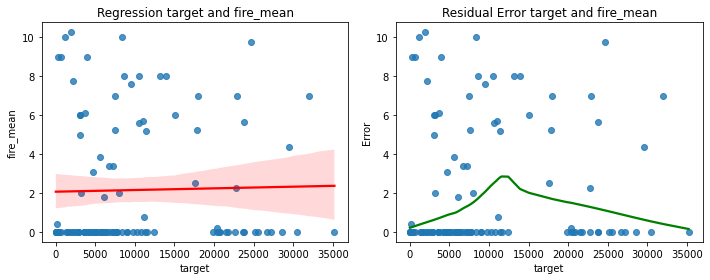

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
fire_pois1_2
fire_pois1_2
Regression
slope:  0.00021958616841261433
intersept:  5.993109963187843
r2:  0.2698903203030627
P_value:  0.004538026140800542
std error:  7.573610089875225e-05


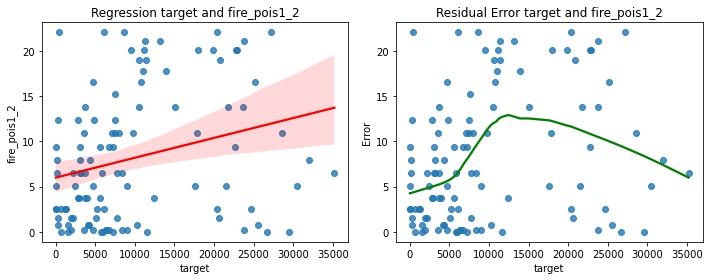

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
fire_pois1_5
fire_pois1_5
Regression
slope:  0.00010365425205748646
intersept:  1.191560712754783
r2:  0.28194531025911507
P_value:  0.0029764180092894717
std error:  3.4099174761097575e-05


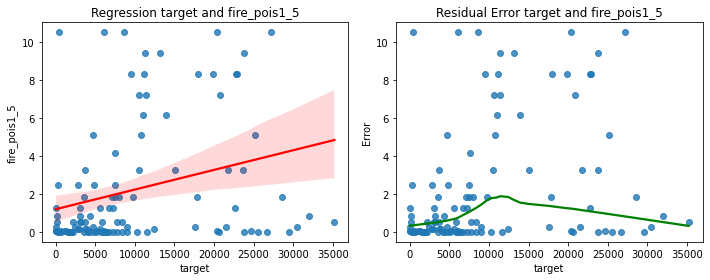

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
fire_pois1_10
fire_pois1_10
Regression
slope:  3.5895021623221105e-05
intersept:  0.27072258052088355
r2:  0.2544830661598454
P_value:  0.0075768820939104324
std error:  1.3186957290574842e-05


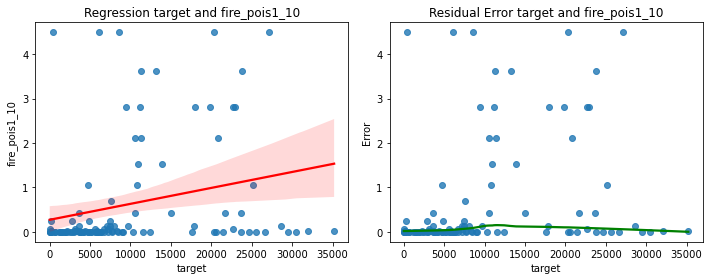

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
rain_d_mean
rain_d_mean
Regression
slope:  -6.339794782728285e-08
intersept:  0.0024620956941597194
r2:  -0.041607149898570575
P_value:  0.6675088515005612
std error:  1.471767140820318e-07


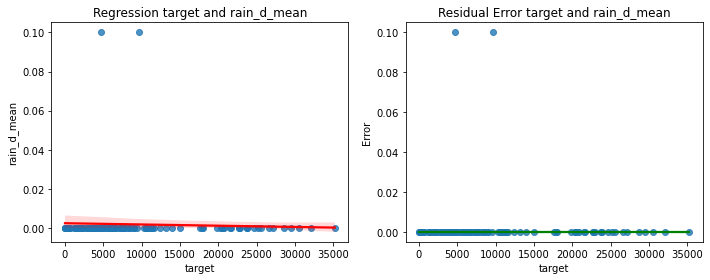

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
et_ma_mean
et_ma_mean
Regression
slope:  4.099648826504803e-05
intersept:  1.7925626872750535
r2:  0.21894345531010811
P_value:  0.022177745330476936
std error:  1.7662648173254373e-05


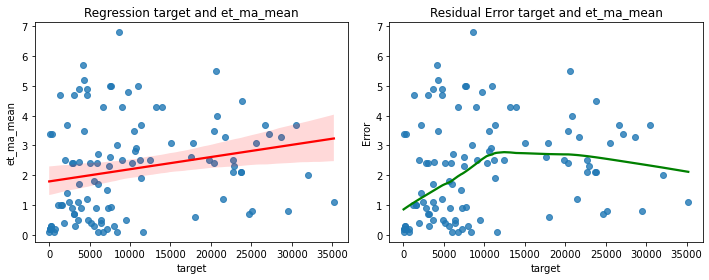

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
tmax_mean
tmax_mean
Regression
slope:  4.915969388951778e-06
intersept:  31.192647817602584
r2:  0.010179314489958144
P_value:  0.9163340356894228
std error:  4.668488005809095e-05


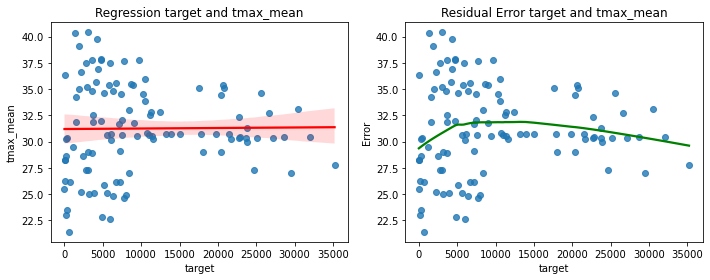

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
tmin_mean
tmin_mean
Regression
slope:  2.1845627153403017e-05
intersept:  15.530657310342695
r2:  0.0336913341283559
P_value:  0.727996870282928
std error:  6.264808416229671e-05


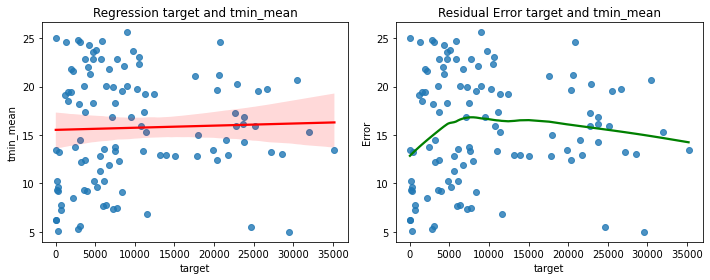

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
rh_tmax_mean
rh_tmax_mean
Regression
slope:  0.0010019749445373735
intersept:  3307.8960449225065
r2:  0.49428100187857077
P_value:  4.698577119630531e-08
std error:  0.0001703577229083873


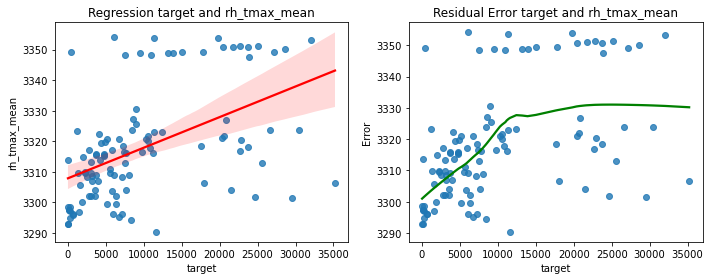

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
rh_tmin_mean
rh_tmin_mean
Regression
slope:  0.0007499104432839974
intersept:  3354.728399886181
r2:  0.40310731106026576
P_value:  1.386932523115548e-05
std error:  0.00016458506047922788


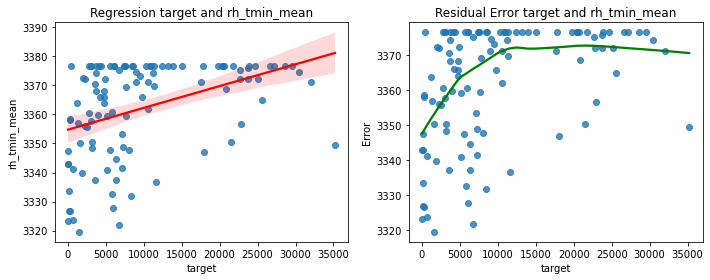

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b1_wfp_dry_mean
b1_wfp_dry_mean
Regression
slope:  0.0014658094106873901
intersept:  12.195748310313167
r2:  0.6666813354209089
P_value:  2.5094048496683956e-15
std error:  0.00015842489305703154


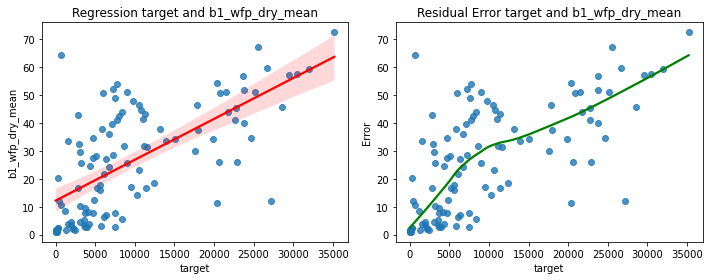

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b1_hsd_mean
b1_hsd_mean
Regression
slope:  9.335098505529797e-05
intersept:  102.07955198594593
r2:  0.658216206766896
P_value:  7.401213888161389e-15
std error:  1.0321783732320942e-05


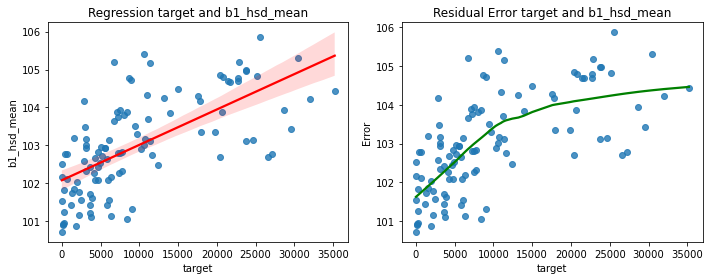

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b1_hmc_mean
b1_hmc_mean
Regression
slope:  0.00021897955603139685
intersept:  103.53222598271108
r2:  0.6786616837472096
P_value:  5.105697671647687e-16
std error:  2.2909794704968303e-05


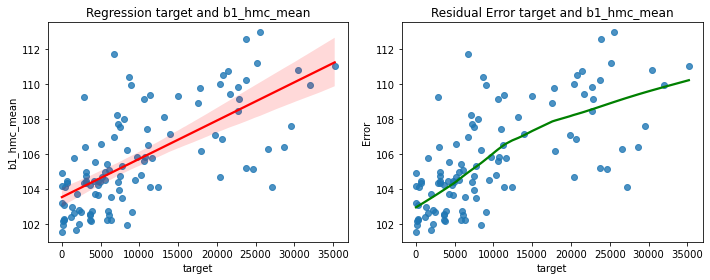

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b1_hcv_mean
b1_hcv_mean
Regression
slope:  -2.9387154709895358e-05
intersept:  154.41798821969292
r2:  -0.026604416857813798
P_value:  0.7836200009473497
std error:  0.00010674760901811212


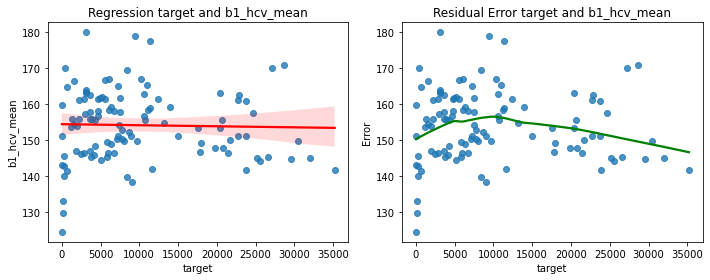

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b1_h99_mean
b1_h99_mean
Regression
slope:  0.00034528965019925276
intersept:  108.05784548169328
r2:  0.6624539760962923
P_value:  4.32555832381267e-15
std error:  3.774655096365731e-05


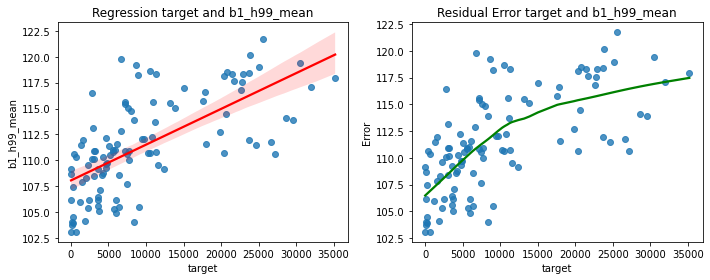

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b1_ccw_dry_mean
b1_ccw_dry_mean
Regression
slope:  0.002005902685717551
intersept:  20.610988693968736
r2:  0.6549861414403739
P_value:  1.1081574596006228e-14
std error:  0.0002237181971020671


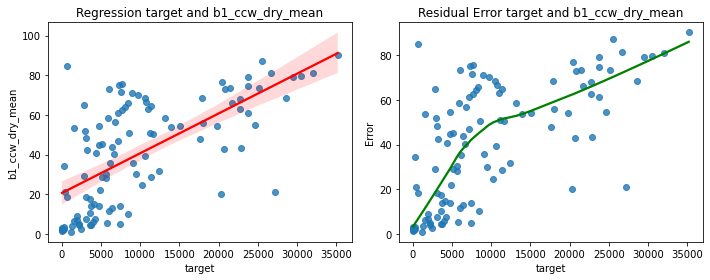

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b1_dbifm_dry_mean
b1_dbifm_dry_mean
Regression
slope:  -0.00932766497588313
intersept:  481.71968252509214
r2:  -0.6305084402989729
P_value:  2.0268544210070522e-13
std error:  0.0011100791159997009


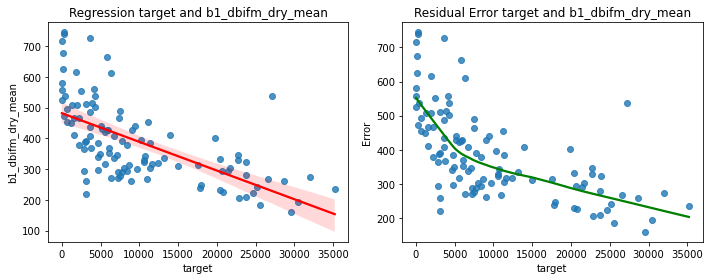

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b1_dp1fm_dry_mean
b1_dp1fm_dry_mean
Regression
slope:  -0.0003248878041598291
intersept:  14.005690072978478
r2:  -0.30231535581786323
P_value:  0.001398388849670131
std error:  9.903050086901654e-05


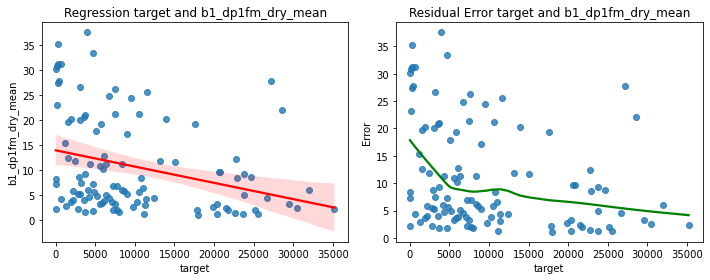

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b2_dp1fm_dry_mean
b2_dp1fm_dry_mean
Regression
slope:  0.0012710878157494432
intersept:  16.932960823576437
r2:  0.674956579540213
P_value:  8.42115121980261e-16
std error:  0.0001343322527595093


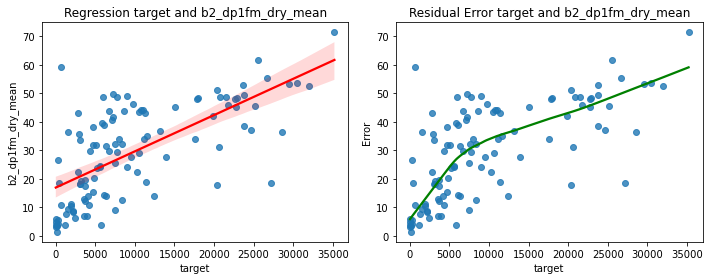

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b3_dp1fm_dry_mean
b3_dp1fm_dry_mean
Regression
slope:  -0.000949243054683451
intersept:  67.60613007916244
r2:  -0.5559122375035654
P_value:  3.495515765334048e-10
std error:  0.00013721647427729271


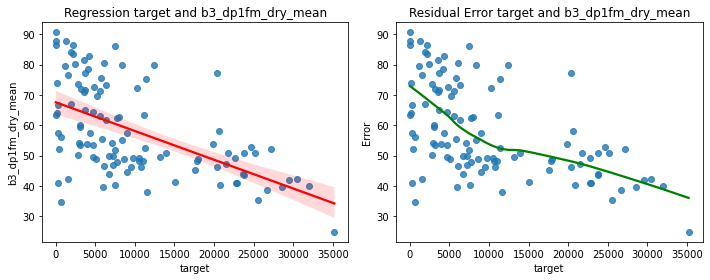

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b2_dbifm_dry_mean
b2_dbifm_dry_mean
Regression
slope:  -0.014401330035299038
intersept:  800.1329969037524
r2:  -0.6580256265084046
P_value:  7.580630596510814e-15
std error:  0.0015931633521904266


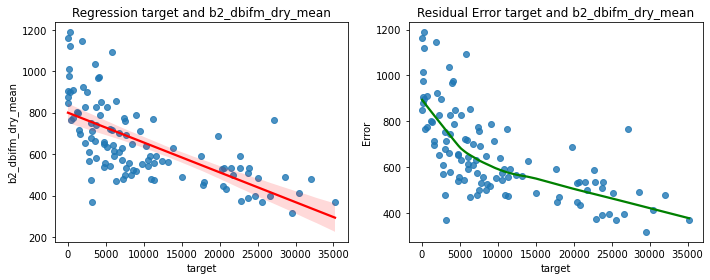

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b3_dbifm_dry_mean
b3_dbifm_dry_mean
Regression
slope:  -0.023982631205550553
intersept:  1152.3672762308245
r2:  -0.6814399261195254
P_value:  3.491505566160462e-16
std error:  0.0024900823738618996


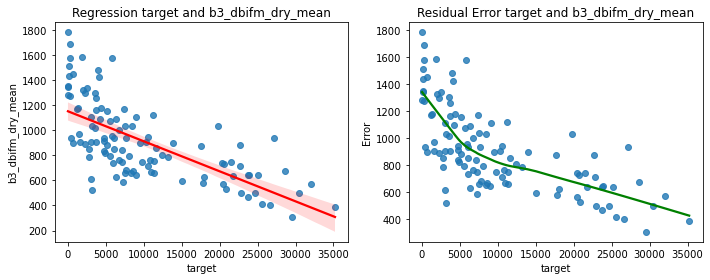

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b4_dbifm_dry_mean
b4_dbifm_dry_mean
Regression
slope:  -0.004553729286717901
intersept:  2127.9149888787883
r2:  -0.13120700519459985
P_value:  0.1738502797022964
std error:  0.0033261933836773254


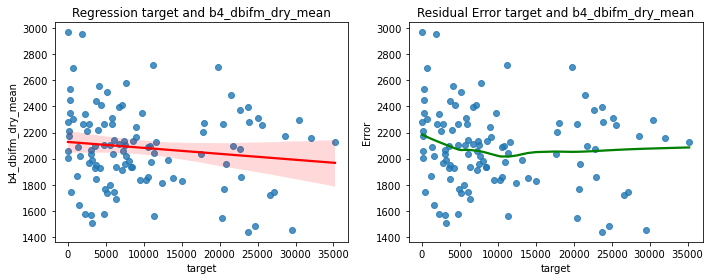

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b5_dbifm_dry_mean
b5_dbifm_dry_mean
Regression
slope:  -0.03843053055119491
intersept:  2727.9159037686272
r2:  -0.6817877370338628
P_value:  3.328304597487684e-16
std error:  0.003986386032847699


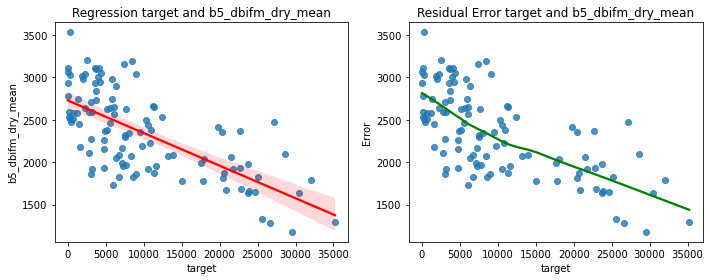

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
b6_dbifm_dry_mean
b6_dbifm_dry_mean
Regression
slope:  -0.03504238812732291
intersept:  1819.899471169168
r2:  -0.6552774910657939
P_value:  1.0687522663147444e-14
std error:  0.003905231487085876


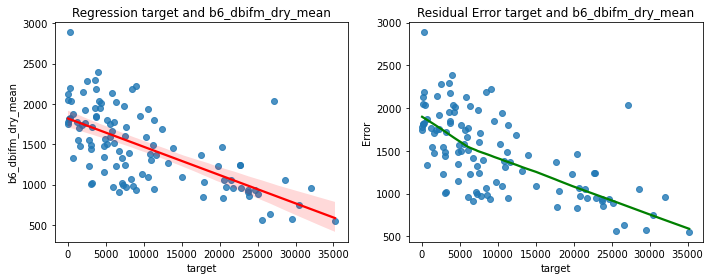

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_GSAVI
dbifmdry_GSAVI
Regression
slope:  25.583206937295717
intersept:  2503314.4390125787
r2:  0.47133553849757337
P_value:  2.3047518323829054e-07
std error:  4.627845260490248


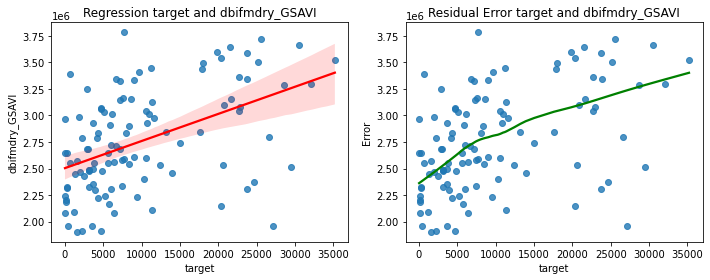

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_GNDVI
dbifmdry_GNDVI
Regression
slope:  70.99094616184895
intersept:  4547706.200962432
r2:  0.6842885077497035
P_value:  2.354493156019559e-16
std error:  7.313500029398888


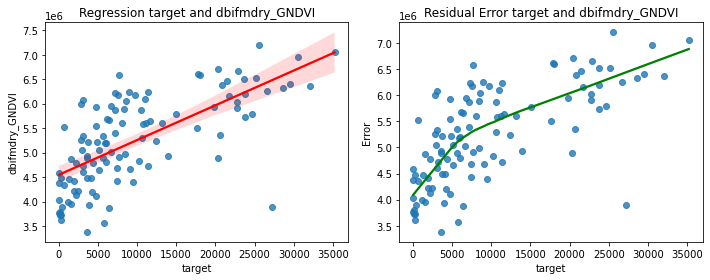

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_CVI
dbifmdry_CVI
Regression
slope:  686.9349001776789
intersept:  39059313.692185
r2:  0.5899929895580651
P_value:  1.4695781008975646e-11
std error:  90.88037019080043


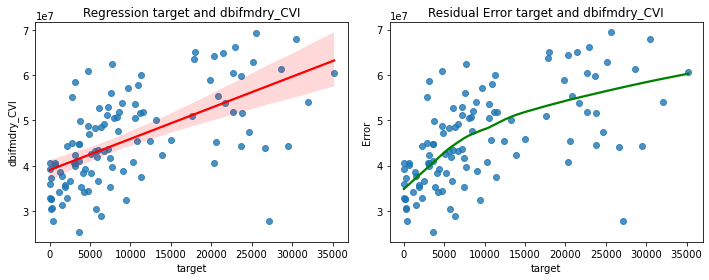

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_NDGI
dbifmdry_NDGI
Regression
slope:  29.153458133527597
intersept:  -1841117.0160797783
r2:  0.5552580785152811
P_value:  3.7019000448316505e-10
std error:  4.22142006134745


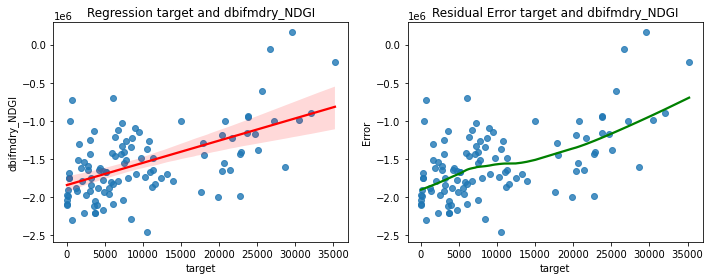

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_RI
dbifmdry_RI
Regression
slope:  -29.153458133527597
intersept:  1841117.0160797783
r2:  -0.5552580785152811
P_value:  3.7019000448316505e-10
std error:  4.22142006134745


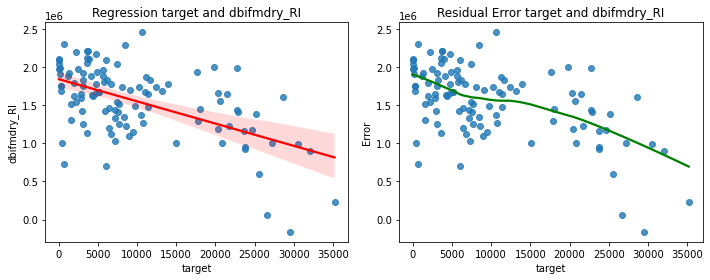

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_NBR
dbifmdry_NBR
Regression
slope:  114.95229412438587
intersept:  728913.313803426
r2:  0.6019020849108038
P_value:  4.4405428959709224e-12
std error:  14.743915776630459


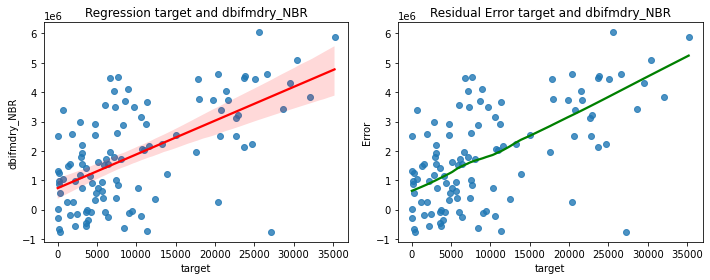

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_NDII
dbifmdry_NDII
Regression
slope:  77.28668714853316
intersept:  -1293039.0136660761
r2:  0.5927250910699313
P_value:  1.1215788977331172e-11
std error:  10.152517096903743


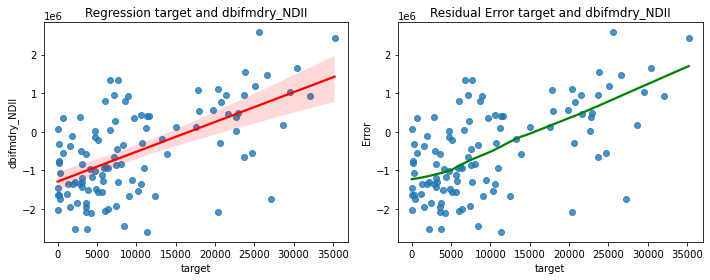

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_GDVI
dbifmdry_GDVI
Regression
slope:  9.842923848757794
intersept:  1327875.0268114423
r2:  0.31510016894784804
P_value:  0.0008461046383165499
std error:  2.866002379149018


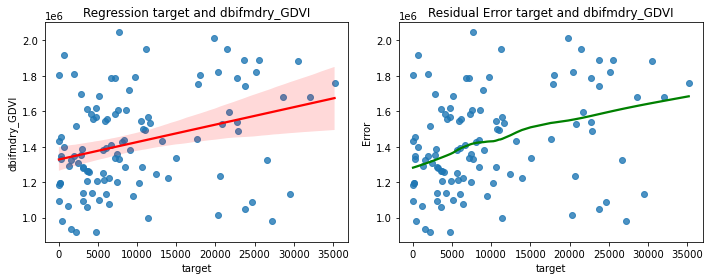

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_MSAVI
dbifmdry_MSAVI
Regression
slope:  39.90097907837941
intersept:  1529888.5730886962
r2:  0.6053360741385323
P_value:  3.115614422393279e-12
std error:  5.072146700475189


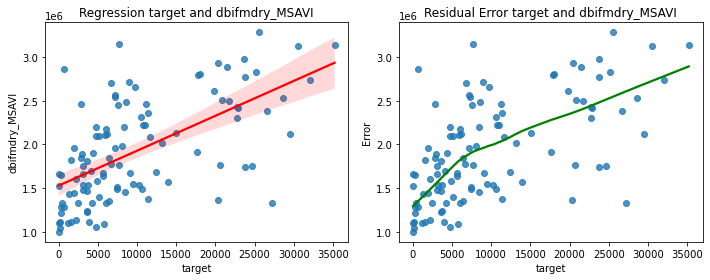

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_DVI
dbifmdry_DVI
Regression
slope:  19.42812064811607
intersept:  975593.4773883849
r2:  0.527981473354077
P_value:  3.6389246015074675e-09
std error:  3.0210560721805244


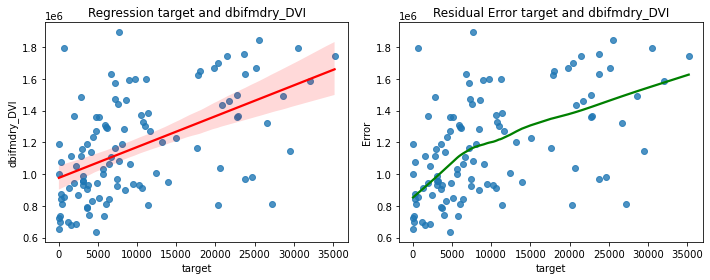

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_SAVI
dbifmdry_SAVI
Regression
slope:  44.199226919948565
intersept:  1762383.3698884486
r2:  0.6262866140641282
P_value:  3.2609957020201585e-13
std error:  5.3188473421023374


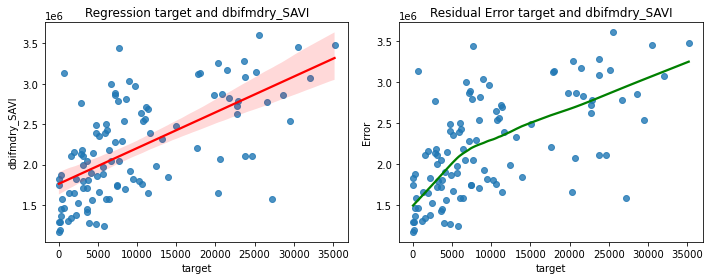

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_NDVI
dbifmdry_NDVI
Regression
slope:  104.36688230521082
intersept:  2978224.8833944085
r2:  0.7266796612603658
P_value:  3.751263838650668e-19
std error:  9.538271456470031


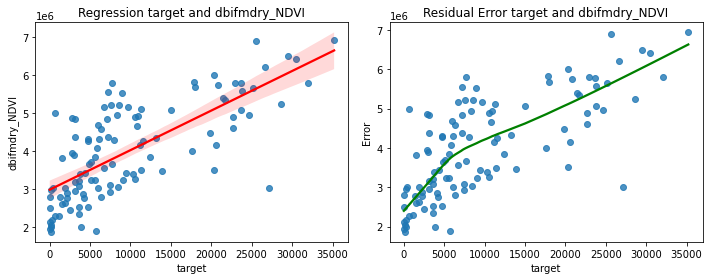

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497
dbifmdry_MSR
dbifmdry_MSR
Regression
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497


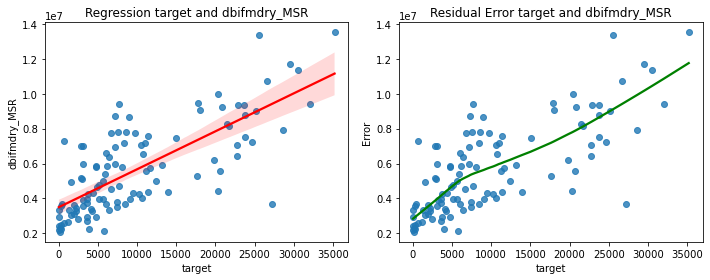

--------------------------------------------------
Residuals
slope:  217.79476510935123
intersept:  3493547.1805094467
r2:  0.7486590909555672
P_value:  8.085073375275601e-21
std error:  18.644709077201497


In [63]:
for i in df_ml.columns[1:]:
    print(i)
    value_x = 'target'
    value_y_loop = str(i)
    print(value_y_loop)
    plt.figure(figsize=(10,4))
    # left plot
    plt.subplot(1,2,1)
    sns.regplot(data = df_ml, x=value_x, y =value_y_loop, line_kws={"color":"red"})
    plt.xlabel(value_x)
    plt.ylabel(value_y_loop)
    plt.title("Regression {0} and {1}".format(value_x, value_y_loop))
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y_loop])

    print("="*50)
    print("Regression")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

    # right plot
    plt.subplot(1,2,2)
    sns.regplot(data=df_ml, x=value_x, y=value_y_loop, lowess=True, line_kws={"color":"green"})
    plt.xlabel(value_x)
    plt.ylabel("Error")
    plt.title("Residual Error {0} and {1}".format(value_x, value_y_loop))
    plt.tight_layout()
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df_ml[value_x], df_ml[value_y])

    print("-"*50)
    print("Residuals")
    print("slope: ", slope)
    print("intersept: ", intercept)
    print("r2: ", r_value)
    print("P_value: ", p_value)
    print("std error: ", std_err)

### Split off unseen data

In [64]:
# Creating a dataframe with 20%
# values of original dataframe
unseen_data = df_ml.sample(frac = 0.2)
 
# Creating dataframe with
# rest of the 80% values
model_data = df_ml.drop(unseen_data.index)

In [65]:
# randomly split data into train and test datasets, the user needs to define the variables 
xdata1 = model_data.iloc[:, 1:].astype('float32')
ydata1 = model_data[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()
#y_data_float=ydata.astype("float32")

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(60, 38) (60,)
(27, 38) (27,)


### Plot up Histograms for train and test datasets

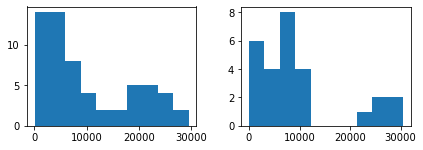

In [66]:
plt.subplot(2, 2, 1)
plt.hist(y_1)
plt.subplot(2, 2, 2)
plt.hist(y_2)
plt.tight_layout()

### Parameterise the Random Forest Regressor alogorthim

for details see: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [67]:
print(xdata1)

     fire_mean  fire_pois1_2  fire_pois1_5  fire_pois1_10  rain_d_mean  \
1        10.00          6.49          0.49           0.01         0.00   
3         9.75          2.57          0.05           0.00         0.00   
4         5.00          9.43          1.26           0.06         0.00   
5         4.38          0.00          0.00           0.00         0.00   
9         0.00          0.00          0.00           0.00         0.00   
..         ...           ...           ...            ...          ...   
173       0.00          2.57          0.05           0.00         0.00   
177       0.00          0.00          0.00           0.00         0.00   
179       0.00         21.11          9.43           3.61         0.00   
180       9.00         12.39          2.48           0.25         0.00   
185       0.00          0.73          0.00           0.00         0.00   

     et_ma_mean  tmax_mean  tmin_mean  rh_tmax_mean  rh_tmin_mean  ...  \
1          0.10      27.00       9.10

In [68]:
print(ydata)

[8.3762158e+03 2.4670801e+04 3.0861599e+03 2.9521801e+04 6.6528003e+02
 6.0060000e+03 1.3490400e+03 1.8942000e+03 1.7994760e+04 3.1231201e+03
 7.4785898e+03 1.0763322e+04 2.6636295e+04 2.1469141e+04 2.2699391e+04
 1.1180400e+04 3.7422000e+03 2.2176001e+03 4.7239990e+03 7.7153999e+03
 4.8727769e+03 8.0314502e+03 3.1569021e+03 5.5881421e+03 2.5585070e+04
 6.3756001e+03 3.0472447e+04 1.7598352e+04 2.0805217e+04 1.5361500e+03
 1.1642400e+03 4.7360132e+03 1.5490861e+03 1.9475867e+03 3.9154500e+03
 2.2152900e+03 6.8991998e+02 7.2031958e+03 3.6158325e+03 6.0447378e+03
 5.6064385e+03 3.6687932e+03 5.1737070e+03 2.3737561e+04 9.0309453e+03
 8.4137900e+03 1.2432934e+04 1.0273340e+04 2.0359826e+04 7.2401177e+03
 5.7780801e+03 2.9932466e+03 5.1178052e+03 4.3276240e+03 5.8816987e+03
 2.8244580e+03 1.0544602e+04 4.1420864e+03 8.6271875e+03 2.0631123e+04
 2.3807330e+04 1.3908650e+04 7.5529648e+03 1.0982860e+04 1.5024625e+04
 2.1703027e+04 2.8623980e+04 3.6960001e+02 2.7176059e+04 2.0381025e+04
 6.094

In [73]:
# Prepare data
#X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(xdata1, ydata, test_size=0.3, random_state=42)

# Define Random Forest classifier
rf = gbr()

# Define parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 300], #5, 10, 20, 30, 40, 
#     'learning_rate': [0.01, 0.1, 1.0],
#         'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'max_depth': [None, 2, 3, 4, 5, 10, 20],
#     'min_samples_split': [2, 3, 4, 5, 10],
#     'min_samples_leaf': [1, 2, 3, 4, 5],
#     'max_features': ['auto', 'sqrt'],
#    'bootstrap': [True, False]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best parameters
best_params = grid_search.best_params_

# Evaluate model performance
best_rf = grid_search.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)

print("Best parameters:", best_params)
print("Test accuracy:", test_accuracy)

Best parameters: {'n_estimators': 10}
Test accuracy: 0.3146841239483279


C:\Users\robot\anaconda3\envs\biomass_zonal\lib\site-packages\sklearn\model_selection\_search.py:972: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  category=UserWarning,


## Veg and indicies

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 50}

    Test accuracy: 0.6268057302141554
        
        min n_setimators = 50

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2}

    Test accuracy: 0.7000961702235816

## Veg only

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2}

    Test accuracy: 0.7000961702235816
        
        cv=5

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 2}

    Test accuracy: 0.5877821429617505
    
    cv=3

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}

    Test accuracy: 0.6558192116434494

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}

    Test accuracy: 0.720199762528393

Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 10}

Test accuracy: 0.6999698307848703

In [74]:
# rng = np.random.RandomState(1)
# rfrModel_1 = abr(dtr(max_depth=4), n_estimators=300, random_state=rng)
# rfrModel_1

In [75]:
# rfrModel_1 = gbr(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0, loss='ls')
# rfrModel_1

In [76]:
# rfrModel_1 = etr(n_estimators=100, bootstrap=True, oob_score=True,  max_features='log2', min_samples_split=1,n_jobs=-1) 
# rfrModel_1

In [77]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [78]:
# rfrModel_1 = rfr(n_estimators=100, oob_score=True) #,  max_depth=None, max_features='log2', min_samples_split=1.0,n_jobs=-1) 
# rfrModel_1,

In [79]:
np.nan_to_num(X_1)

array([[1.0000000e+01, 6.4920001e+00, 4.9399999e-01, ..., 2.5345710e+06,
        4.9479370e+06, 7.2011010e+06],
       [4.3750000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.5355240e+06,
        6.5034170e+06, 1.1725261e+07],
       [8.0000000e+00, 1.3818000e+01, 3.2670000e+00, ..., 2.6402770e+06,
        4.8966500e+06, 7.0850650e+06],
       ...,
       [0.0000000e+00, 7.3199999e-01, 2.0000001e-03, ..., 2.1125690e+06,
        3.8166890e+06, 4.9482880e+06],
       [9.0000000e+00, 2.5720000e+00, 4.8999999e-02, ..., 1.4648770e+06,
        2.2769640e+06, 2.6081530e+06],
       [1.0250000e+01, 1.5430000e+00, 1.4000000e-02, ..., 1.6484280e+06,
        2.6295260e+06, 3.0901870e+06]], dtype=float32)

### Fit random forest regressor model and compute variable importance score 

may need to restrict the number of variables for the bar graph to be legible



In [80]:
#rfrLCHM = rfrModel_1.fit(X_1, y_1)
rfrLCHM = best_rf.fit(X_1, y_1)

##### good info on the feature importance score - http://stackoverflow.com/questions/15810339/how-are-feature-importances-in-randomforestclassifier-determined

Fitted model r2 = 0.75
Fitted model mse = 18599646.14
n = 60


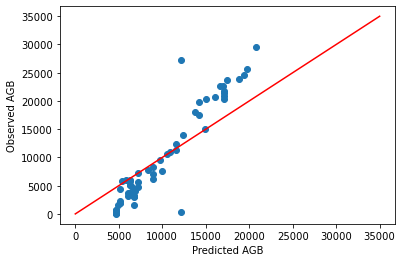

In [81]:
feature_importance = rfrLCHM.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrLCHM.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_rf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.4542894952662694
MSE = 42379387.933
RMSE = 6509.945
bias = -126.481
n = 27


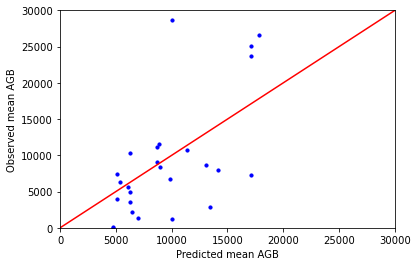

In [82]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

                 band                      n
14        b1_h99_mean    0.25893665125761534
16  b1_dbifm_dry_mean    0.14361915237901754
12        b1_hmc_mean    0.14139093354785146
8        rh_tmax_mean     0.0950124606043805
18  b2_dp1fm_dry_mean    0.09093697906143947
13        b1_hcv_mean    0.04705758384080839
24  b6_dbifm_dry_mean    0.04701878371365331
23  b5_dbifm_dry_mean    0.04645967884666114
22  b4_dbifm_dry_mean    0.03663419395502247
32      dbifmdry_GDVI    0.01650750457967964
37       dbifmdry_MSR   0.010877230393286417
1        fire_pois1_2    0.01079453643061212
33     dbifmdry_MSAVI   0.009582361046546329
28      dbifmdry_NDGI   0.006955871103823954
5          et_ma_mean   0.006394440025742702
29        dbifmdry_RI   0.004370942548161015
21  b3_dbifm_dry_mean   0.004070810375416555
0           fire_mean  0.0038937467327298764
11        b1_hsd_mean  0.0037451993226505767
6           tmax_mean  0.0035602520876640686
17  b1_dp1fm_dry_mean   0.003454699943457814
27       d

<Figure size 720x432 with 0 Axes>

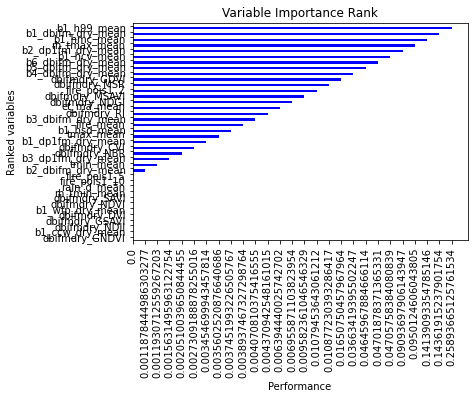

In [83]:
fiResult = np.array(fiResult)
score = (fiResult[:,0])
band = fiResult[:,1]
a = fiResult[np.argsort(fiResult[:, 1])]

df_band = pd.DataFrame(dict(band=band,n=score))
df_band['n'].astype('float')
dfsort = df_band.sort_values(['n'], ascending=[False])
print(dfsort)
 
## my complicated way to get the bar plot to sort in ascending order and display the assocated band names in the y axis
dfsort2 = df_band.sort_values(['n'], ascending=[True])
b = dfsort2[['band']]
c = b.values.tolist()
# convert the list of band names in the correct order to a string
e = str(c)
# strips all the rubbish from the string
f = e.replace('[','').replace(']','').replace("'",'').replace(",",' ')
# convert the cleaned up string back into a list to plot the band names in the bar graph
g = f.split()
 
ind = np.arange(len(df_band))
width = 0.4
 
# Create a figure with a specific size
plt.figure(figsize=(10, 6))

fig, ax = plt.subplots()
ax.barh(ind, dfsort2.n, width, color='blue')
ax.set(yticks=ind + width, yticklabels= g, ylim=[2*width - 1, len(df_band)])
ax.set_xlabel('Performance')
ax.set_ylabel('Ranked variables')
plt.xticks(rotation='vertical')
ax.set_title('Variable Importance Rank')

# plt.show()
# fig.savefig('Band_Importance_Score.pdf',dpi=600)# save out your figure to a pdf 
# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_Band_Importance_Score.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

### Predict the selected model on the test data

In [84]:
# plt.scatter(y2_predict, y_2)
# plt.show()

In [85]:
df_band.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    38 non-null     object
 1   n       38 non-null     object
dtypes: object(2)
memory usage: 736.0+ bytes


In [86]:
dfsort['n'].astype('float')
dfsort.info()
dfsort['n'] = dfsort['n'].astype('float')
dfsort.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 14 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   band    38 non-null     object
 1   n       38 non-null     object
dtypes: object(2)
memory usage: 912.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 14 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   band    38 non-null     object 
 1   n       38 non-null     float64
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes


In [87]:
#Plot has value at the top with very small n value 

In [88]:
#Plot has value at the top with very small n value 
df_var = dfsort.head(12)

In [89]:
#df_var = dfsort[dfsort['n'] > 0.01]

In [90]:
column_var = df_var.band.tolist()

In [91]:
column_var.insert(0, 'target')

In [92]:
column_var

['target',
 'b1_h99_mean',
 'b1_dbifm_dry_mean',
 'b1_hmc_mean',
 'rh_tmax_mean',
 'b2_dp1fm_dry_mean',
 'b1_hcv_mean',
 'b6_dbifm_dry_mean',
 'b5_dbifm_dry_mean',
 'b4_dbifm_dry_mean',
 'dbifmdry_GDVI',
 'dbifmdry_MSR',
 'fire_pois1_2']

In [93]:
model_data

,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rain_d_mean,et_ma_mean,tmax_mean,tmin_mean,rh_tmax_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
1,8376.22,10.00,6.49,0.49,0.01,0.00,0.10,27.00,9.10,3294.40,...,-1341991.00,1341991.00,2881356.00,-338983.00,1438000.00,2197130.00,1283000.00,2534571.00,4947937.00,7201101.00
3,24670.80,9.75,2.57,0.05,0.00,0.00,0.70,27.30,5.50,3301.90,...,-1173184.00,1173184.00,2241024.00,-539075.00,1088000.00,1753382.00,983000.00,2111557.00,4957136.00,7222079.00
4,3086.16,5.00,9.43,1.26,0.06,0.00,0.70,27.30,5.60,3302.10,...,-1255729.00,1255729.00,2197205.00,-836979.00,1094000.00,1668140.00,957000.00,1997912.00,4379863.00,5995724.00
5,29521.80,4.38,0.00,0.00,0.00,0.00,0.80,27.00,5.00,3301.50,...,160256.00,-160256.00,4296991.00,1027397.00,1132000.00,2118919.00,1142000.00,2535524.00,6503417.00,11725261.00
9,665.28,0.00,0.00,0.00,0.00,0.00,0.10,21.40,7.80,3296.10,...,-723252.00,723252.00,3374751.00,357968.00,1915000.00,2866948.00,1794000.00,3133442.00,5000000.00,7320508.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,55.44,0.00,2.57,0.05,0.00,0.00,0.20,28.20,6.20,3293.00,...,-2041295.00,2041295.00,1320755.00,-1463871.00,1432000.00,1530357.00,997000.00,1746467.00,2798204.00,3330735.00
177,11596.20,0.00,0.00,0.00,0.00,0.00,0.10,30.20,6.80,3290.40,...,-1823204.00,1823204.00,2160229.00,416667.00,1533000.00,2086585.00,1269000.00,2385039.00,4256961.00,5755877.00
179,11338.13,0.00,21.11,9.43,3.61,0.00,3.70,32.80,19.20,3322.90,...,-1640212.00,1640212.00,3674699.00,420811.00,1569000.00,2358574.00,1383000.00,2693107.00,5116537.00,7593904.00
180,240.24,9.00,12.38,2.48,0.25,0.00,0.30,28.60,5.10,3294.90,...,-1747930.00,1747930.00,1255680.00,-310891.00,1456000.00,1648036.00,1076000.00,1870220.00,2964187.00,3574240.00


In [94]:
select_df = model_data[column_var]

In [95]:
df_corr = select_df.corr()
df_corr

,target,b1_h99_mean,b1_dbifm_dry_mean,b1_hmc_mean,rh_tmax_mean,b2_dp1fm_dry_mean,b1_hcv_mean,b6_dbifm_dry_mean,b5_dbifm_dry_mean,b4_dbifm_dry_mean,dbifmdry_GDVI,dbifmdry_MSR,fire_pois1_2
target,1.00,0.65,-0.62,0.66,0.50,0.64,0.01,-0.64,-0.66,-0.15,0.27,0.72,0.27
b1_h99_mean,0.65,1.00,-0.68,0.95,0.51,0.72,0.18,-0.73,-0.71,-0.03,0.43,0.73,0.53
b1_dbifm_dry_mean,-0.62,-0.68,1.00,-0.64,-0.32,-0.73,-0.26,0.82,0.79,0.40,-0.21,-0.80,-0.24
b1_hmc_mean,0.66,0.95,-0.64,1.00,0.47,0.78,-0.04,-0.73,-0.70,0.09,0.53,0.77,0.48
rh_tmax_mean,0.50,0.51,-0.32,0.47,1.00,0.36,0.20,-0.25,-0.25,-0.04,0.20,0.34,0.67
b2_dp1fm_dry_mean,0.64,0.72,-0.73,0.78,0.36,1.00,-0.06,-0.83,-0.78,0.07,0.58,0.90,0.35
b1_hcv_mean,0.01,0.18,-0.26,-0.04,0.20,-0.06,1.00,-0.06,-0.13,-0.53,-0.39,-0.07,0.22
b6_dbifm_dry_mean,-0.64,-0.73,0.82,-0.73,-0.25,-0.83,-0.06,1.00,0.92,0.15,-0.40,-0.89,-0.26
b5_dbifm_dry_mean,-0.66,-0.71,0.79,-0.70,-0.25,-0.78,-0.13,0.92,1.00,0.33,-0.17,-0.82,-0.24
b4_dbifm_dry_mean,-0.15,-0.03,0.40,0.09,-0.04,0.07,-0.53,0.15,0.33,1.00,0.80,-0.00,0.08


In [96]:
dfsort.to_csv(os.path.join(output_, "{0}_rf_variable_score.csv".format(var_)))
df_corr.to_csv(os.path.join(output_, "{0}_rf_select_variable_corrolation.csv".format(var_)))

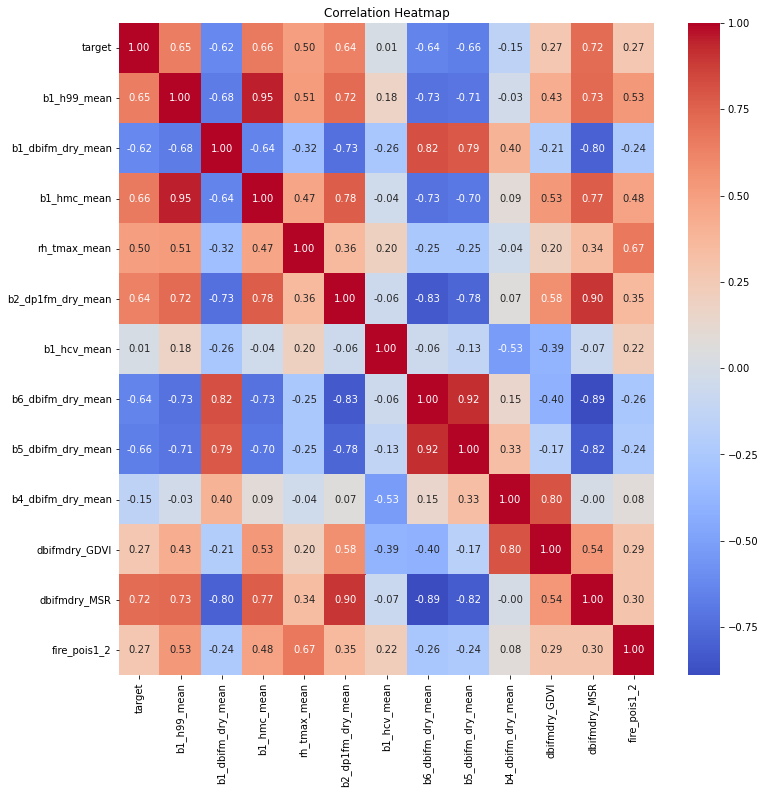

In [97]:
# Create heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_rf_variable_score.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [98]:
select_df

,target,b1_h99_mean,b1_dbifm_dry_mean,b1_hmc_mean,rh_tmax_mean,b2_dp1fm_dry_mean,b1_hcv_mean,b6_dbifm_dry_mean,b5_dbifm_dry_mean,b4_dbifm_dry_mean,dbifmdry_GDVI,dbifmdry_MSR,fire_pois1_2
1,8376.22,113.93,292.44,106.25,3294.40,32.22,169.41,1071.33,2074.78,1938.89,1438000.00,7201101.00,6.49
3,24670.80,111.49,223.58,105.14,3301.90,37.25,157.61,940.25,1652.17,1483.50,1088000.00,7222079.00,2.57
4,3086.16,110.91,259.56,104.74,3302.10,33.78,163.29,1005.33,1858.22,1571.89,1094000.00,5995724.00,9.43
5,29521.80,113.89,159.33,107.59,3301.50,53.33,144.85,578.33,1179.33,1449.44,1132000.00,11725261.00,0.00
9,665.28,103.10,454.17,104.46,3296.10,59.33,141.31,1333.08,2505.25,2691.83,1915000.00,7320508.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,55.44,109.17,524.89,104.18,3293.00,5.78,151.01,1748.22,3062.56,2280.44,1432000.00,3330735.00,2.57
177,11596.20,109.55,316.67,105.78,3290.40,34.89,141.90,1370.67,1955.33,2125.00,1533000.00,5755877.00,0.00
179,11338.13,118.35,304.94,109.40,3322.90,43.19,158.99,945.75,1878.00,2043.19,1569000.00,7593904.00,21.11
180,240.24,107.44,471.83,103.08,3294.90,26.67,142.74,1828.50,2504.25,2353.17,1456000.00,3574240.00,12.38


# Rerun on Selected data

In [99]:
xdata1 = select_df.iloc[:, 1:].astype('float32')
ydata1 = select_df[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata = ydata2.ravel()

X_1, X_2, y_1, y_2 = train_test_split(xdata1, ydata, train_size=0.70)  
         
print(X_1.shape, y_1.shape)
print(X_2.shape, y_2.shape)

(60, 12) (60,)
(27, 12) (27,)


In [100]:
rng = np.random.RandomState(1)
rfrModel_1 = gbr(n_estimators=100, random_state=rng)
#rfrModel_1 = rfr(dtr(max_depth=None), n_estimators=100, min_samples_split=2, min_samples_leaf=1, random_state=rng)
rfrModel_1

#Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

GradientBoostingRegressor(random_state=RandomState(MT19937) at 0x2A5A0FD0AE8)

In [101]:
rfrLCHM = rfrModel_1.fit(X_1, y_1)

In [102]:
select_df

,target,b1_h99_mean,b1_dbifm_dry_mean,b1_hmc_mean,rh_tmax_mean,b2_dp1fm_dry_mean,b1_hcv_mean,b6_dbifm_dry_mean,b5_dbifm_dry_mean,b4_dbifm_dry_mean,dbifmdry_GDVI,dbifmdry_MSR,fire_pois1_2
1,8376.22,113.93,292.44,106.25,3294.40,32.22,169.41,1071.33,2074.78,1938.89,1438000.00,7201101.00,6.49
3,24670.80,111.49,223.58,105.14,3301.90,37.25,157.61,940.25,1652.17,1483.50,1088000.00,7222079.00,2.57
4,3086.16,110.91,259.56,104.74,3302.10,33.78,163.29,1005.33,1858.22,1571.89,1094000.00,5995724.00,9.43
5,29521.80,113.89,159.33,107.59,3301.50,53.33,144.85,578.33,1179.33,1449.44,1132000.00,11725261.00,0.00
9,665.28,103.10,454.17,104.46,3296.10,59.33,141.31,1333.08,2505.25,2691.83,1915000.00,7320508.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,55.44,109.17,524.89,104.18,3293.00,5.78,151.01,1748.22,3062.56,2280.44,1432000.00,3330735.00,2.57
177,11596.20,109.55,316.67,105.78,3290.40,34.89,141.90,1370.67,1955.33,2125.00,1533000.00,5755877.00,0.00
179,11338.13,118.35,304.94,109.40,3322.90,43.19,158.99,945.75,1878.00,2043.19,1569000.00,7593904.00,21.11
180,240.24,107.44,471.83,103.08,3294.90,26.67,142.74,1828.50,2504.25,2353.17,1456000.00,3574240.00,12.38


## Re-train model on selected paramiters

Fitted model r2 = 1.00
Fitted model mse = 36130.43
n = 60


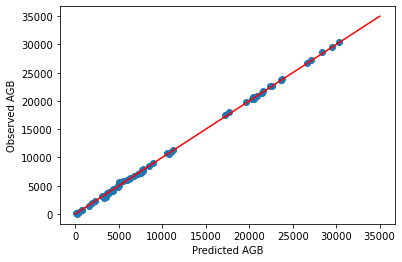

In [103]:
feature_importance = rfrModel_1.feature_importances_

### TRY THIS
# use "feature importance" scores to see what the top 10 important features are
fi = enumerate(rfrModel_1.feature_importances_)
cols = xdata1.columns
fiResult = [(value,cols[i]) for (i,value) in fi]
#fiResult = [(value,cols[i]) for (i,value) in fi if value > 0.001]
## Change the value 0.04 which we picked empirically to give us 10 variables
## try running this code after changing the value up and down so you get more or less variables
## do you see how this might be useful in refining the model?
## Here is the code in case you mess up the line above
## [(value,cols[i]) for (i,value) in fi if value > 0.04]
#print fiResult

print('Fitted model r2 =' ,  format(rfrLCHM.score(X_1, y_1), '.2f'))
print('Fitted model mse =', format(np.mean((y_1 - rfrLCHM.predict(X_1))**2), '.2f'))
print('n =', len(y_1))
plt.scatter(rfrLCHM.predict(X_1), y_1,)  
# data for the 1 for 1 line
x = [0,35000]
y = [0,35000]

#sets the limits of the axis
#plt.xlim(-1,35)
#plt.ylim(-1,35)

plt.ylabel('Observed AGB')

plt.xlabel('Predicted AGB')

# 1 for 1 line

plt.plot(x, y, color = 'r')

plt.savefig(os.path.join(output_, "{0}_selectedrf_train.pdf".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

Predicted data r2 = 0.027467646976083726
MSE = 53677505.355
RMSE = 7326.493
bias = -1567.758
n = 27


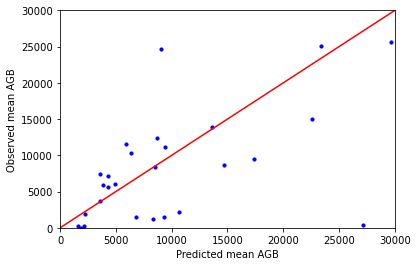

In [104]:
y2_predict = rfrLCHM.predict(X_2)

print('Predicted data r2 =', rfrLCHM.score(X_2, y_2))
print('MSE =', format(np.mean((y_2 - rfrLCHM.predict(X_2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((y2_predict - y_2) ** 2)), '.3f'))
#print 'explained_var =',format(explained_variance_score(y_2, y2_predict),  '.3f') 
print('bias =' , format(np.mean(y_2) - np.mean(y2_predict), '.3f'))
print('n =' , len(y_2))

plt.scatter(y2_predict, y_2 ,s=10, c='b', marker='o')
# data for the 1 for 1 line
x = [-1,30000]
y = [-1,30000]

#sets the limits of the axis
plt.xlim(-1,30000)
plt.ylim(-1, 30000)
plt.ylabel('Observed mean AGB')
plt.xlabel('Predicted mean AGB')
# 1 for 1 line
plt.plot(x, y, color = 'r')

# Save the plot
plt.savefig(os.path.join(output_, "{0}_selected_rf_test_data.png".format(var_)), dpi=300)  # dpi sets the resolution in dots per inch
plt.show()

In [105]:
variable_imp_list = dfsort.band.to_list()

# =================================================================

# STOP - do you realy want to save this model?

# remember to change the cPickle file name !!

# Save current fitted model and apply to unseen validation data 

In [106]:
import pickle

#rfrL8CHM = rfr()
#rfrL8CHM.fit(X_1, y_1)

with open('gbr_modelName_nt100_n17', 'wb') as f:
    pickle.dump(rfrLCHM, f)

In [107]:
# read in your validation dataset which has never been seen by rfr model - NOTE in this example I am just reading the same data used to train the model

unseen_data

,target,fire_mean,fire_pois1_2,fire_pois1_5,fire_pois1_10,rain_d_mean,et_ma_mean,tmax_mean,tmin_mean,rh_tmax_mean,...,dbifmdry_NDGI,dbifmdry_RI,dbifmdry_NBR,dbifmdry_NDII,dbifmdry_GDVI,dbifmdry_MSAVI,dbifmdry_DVI,dbifmdry_SAVI,dbifmdry_NDVI,dbifmdry_MSR
44,35199.71,0.00,6.49,0.49,0.01,0.00,1.10,27.80,13.40,3306.50,...,-226365.00,226365.00,5864128.00,2434172.00,1758000.00,3131803.00,1741000.00,3477827.00,6939020.00,13524145.00
120,10569.77,5.60,18.98,7.22,2.12,0.00,2.80,36.00,23.10,3321.60,...,-2453826.00,2453826.00,-210748.00,-1344048.00,1286000.00,1495896.00,914000.00,1757242.00,3261956.00,4029328.00
18,73.92,0.00,2.57,0.05,0.00,0.00,3.40,36.30,25.00,3313.80,...,-1971644.00,1971644.00,-300388.00,-1632184.00,1096000.00,1001333.00,651000.00,1169041.00,1941545.00,2173189.00
109,6360.20,0.00,0.20,0.00,0.00,0.00,0.40,24.80,7.80,3299.50,...,-1464968.00,1464968.00,1568159.00,-944103.00,1224000.00,1841583.00,1063000.00,2177386.00,4575979.00,6392991.00
133,6726.41,3.40,9.43,1.26,0.06,0.00,4.30,35.60,21.80,3320.90,...,-1115974.00,1115974.00,4497579.00,1342647.00,1786000.00,2701811.00,1633000.00,3002942.00,5172632.00,7728634.00
126,8984.91,0.00,5.09,0.27,0.00,0.00,4.30,35.40,25.60,3330.60,...,-1093885.00,1093885.00,4108381.00,913965.00,1722000.00,2710963.00,1595000.00,3035012.00,5532431.00,8645933.00
140,13212.73,8.00,21.11,9.43,3.61,0.00,4.30,30.70,12.90,3348.80,...,-1691395.00,1691395.00,2232115.00,-184775.00,1432000.00,2011231.00,1204000.00,2321337.00,4330935.00,5899430.00
54,3648.39,0.00,13.82,3.27,0.43,0.00,4.90,37.80,22.90,3315.60,...,-2053743.00,2053743.00,1427234.00,-573248.00,1614000.00,1814979.00,1186000.00,2045298.00,3207139.00,3943699.00
153,11365.20,5.20,18.98,7.22,2.12,0.00,1.90,30.50,15.30,3353.70,...,-1480916.00,1480916.00,-734900.00,-2596291.00,999000.00,1371033.00,805000.00,1652073.00,3486358.00,4389158.00
118,7432.81,0.00,10.92,1.81,0.13,0.00,2.30,34.50,18.30,3316.50,...,-2035033.00,2035033.00,386955.00,-1927369.00,1361000.00,1514929.00,966000.00,1745363.00,2925500.00,3516859.00


In [108]:
c_list = unseen_data.columns.tolist()
c_list

['target',
 'fire_mean',
 'fire_pois1_2',
 'fire_pois1_5',
 'fire_pois1_10',
 'rain_d_mean',
 'et_ma_mean',
 'tmax_mean',
 'tmin_mean',
 'rh_tmax_mean',
 'rh_tmin_mean',
 'b1_wfp_dry_mean',
 'b1_hsd_mean',
 'b1_hmc_mean',
 'b1_hcv_mean',
 'b1_h99_mean',
 'b1_ccw_dry_mean',
 'b1_dbifm_dry_mean',
 'b1_dp1fm_dry_mean',
 'b2_dp1fm_dry_mean',
 'b3_dp1fm_dry_mean',
 'b2_dbifm_dry_mean',
 'b3_dbifm_dry_mean',
 'b4_dbifm_dry_mean',
 'b5_dbifm_dry_mean',
 'b6_dbifm_dry_mean',
 'dbifmdry_GSAVI',
 'dbifmdry_GNDVI',
 'dbifmdry_CVI',
 'dbifmdry_NDGI',
 'dbifmdry_RI',
 'dbifmdry_NBR',
 'dbifmdry_NDII',
 'dbifmdry_GDVI',
 'dbifmdry_MSAVI',
 'dbifmdry_DVI',
 'dbifmdry_SAVI',
 'dbifmdry_NDVI',
 'dbifmdry_MSR']

In [109]:
df = unseen_data[column_var]

In [110]:
df

,target,b1_h99_mean,b1_dbifm_dry_mean,b1_hmc_mean,rh_tmax_mean,b2_dp1fm_dry_mean,b1_hcv_mean,b6_dbifm_dry_mean,b5_dbifm_dry_mean,b4_dbifm_dry_mean,dbifmdry_GDVI,dbifmdry_MSR,fire_pois1_2
44,35199.71,117.95,234.00,111.05,3306.50,71.33,141.64,554.11,1293.56,2125.78,1758000.00,13524145.00,6.49
120,10569.77,110.66,322.92,105.60,3321.60,29.17,156.70,1938.92,2435.42,1858.92,1286000.00,4029328.00,18.98
18,73.92,106.19,580.78,103.21,3313.80,4.89,159.72,2126.56,2783.78,2002.67,1096000.00,2173189.00,2.57
109,6360.20,108.57,269.89,103.55,3299.50,31.67,159.07,1234.89,2046.00,1693.00,1224000.00,6392991.00,0.20
133,6726.41,119.81,337.22,111.69,3320.90,43.78,146.31,909.67,1828.56,2395.78,1786000.00,7728634.00,9.43
126,8984.91,118.20,261.00,109.95,3330.60,48.92,151.12,935.83,1864.67,2239.42,1722000.00,8645933.00,5.09
140,13212.73,115.49,336.17,108.11,3348.80,36.83,154.67,1265.83,2067.83,1992.00,1432000.00,5899430.00,21.11
54,3648.39,109.20,487.08,104.24,3315.60,17.42,162.45,1832.08,2739.00,2442.25,1614000.00,3943699.00,13.82
153,11365.20,110.78,385.69,104.14,3353.70,18.88,177.68,1804.81,2649.06,1557.44,999000.00,4389158.00,18.98
118,7432.81,107.70,464.67,103.95,3316.50,9.11,154.16,1975.33,3153.22,2134.67,1361000.00,3516859.00,10.92


In [111]:
#df1 = df[(df['comp'] == 'l57')]
df1 = df[(df['target'] > 0.0)]
df1.dropna(inplace=True)
print (df1.shape)

(22, 13)


In [112]:
# dfx = df1[:1]
# dfy = df1[1:]

In [113]:
df1.columns

Index(['target', 'b1_h99_mean', 'b1_dbifm_dry_mean', 'b1_hmc_mean',
       'rh_tmax_mean', 'b2_dp1fm_dry_mean', 'b1_hcv_mean', 'b6_dbifm_dry_mean',
       'b5_dbifm_dry_mean', 'b4_dbifm_dry_mean', 'dbifmdry_GDVI',
       'dbifmdry_MSR', 'fire_pois1_2'],
      dtype='object')

In [114]:
column_var

['target',
 'b1_h99_mean',
 'b1_dbifm_dry_mean',
 'b1_hmc_mean',
 'rh_tmax_mean',
 'b2_dp1fm_dry_mean',
 'b1_hcv_mean',
 'b6_dbifm_dry_mean',
 'b5_dbifm_dry_mean',
 'b4_dbifm_dry_mean',
 'dbifmdry_GDVI',
 'dbifmdry_MSR',
 'fire_pois1_2']

In [115]:
df1[column_var].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 44 to 145
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   target             22 non-null     float64
 1   b1_h99_mean        22 non-null     float64
 2   b1_dbifm_dry_mean  22 non-null     float64
 3   b1_hmc_mean        22 non-null     float64
 4   rh_tmax_mean       22 non-null     float64
 5   b2_dp1fm_dry_mean  22 non-null     float64
 6   b1_hcv_mean        22 non-null     float64
 7   b6_dbifm_dry_mean  22 non-null     float64
 8   b5_dbifm_dry_mean  22 non-null     float64
 9   b4_dbifm_dry_mean  22 non-null     float64
 10  dbifmdry_GDVI      22 non-null     float64
 11  dbifmdry_MSR       22 non-null     float64
 12  fire_pois1_2       22 non-null     float64
dtypes: float64(13)
memory usage: 2.4 KB


In [116]:
df1

,target,b1_h99_mean,b1_dbifm_dry_mean,b1_hmc_mean,rh_tmax_mean,b2_dp1fm_dry_mean,b1_hcv_mean,b6_dbifm_dry_mean,b5_dbifm_dry_mean,b4_dbifm_dry_mean,dbifmdry_GDVI,dbifmdry_MSR,fire_pois1_2
44,35199.71,117.95,234.00,111.05,3306.50,71.33,141.64,554.11,1293.56,2125.78,1758000.00,13524145.00,6.49
120,10569.77,110.66,322.92,105.60,3321.60,29.17,156.70,1938.92,2435.42,1858.92,1286000.00,4029328.00,18.98
18,73.92,106.19,580.78,103.21,3313.80,4.89,159.72,2126.56,2783.78,2002.67,1096000.00,2173189.00,2.57
109,6360.20,108.57,269.89,103.55,3299.50,31.67,159.07,1234.89,2046.00,1693.00,1224000.00,6392991.00,0.20
133,6726.41,119.81,337.22,111.69,3320.90,43.78,146.31,909.67,1828.56,2395.78,1786000.00,7728634.00,9.43
126,8984.91,118.20,261.00,109.95,3330.60,48.92,151.12,935.83,1864.67,2239.42,1722000.00,8645933.00,5.09
140,13212.73,115.49,336.17,108.11,3348.80,36.83,154.67,1265.83,2067.83,1992.00,1432000.00,5899430.00,21.11
54,3648.39,109.20,487.08,104.24,3315.60,17.42,162.45,1832.08,2739.00,2442.25,1614000.00,3943699.00,13.82
153,11365.20,110.78,385.69,104.14,3353.70,18.88,177.68,1804.81,2649.06,1557.44,999000.00,4389158.00,18.98
118,7432.81,107.70,464.67,103.95,3316.50,9.11,154.16,1975.33,3153.22,2134.67,1361000.00,3516859.00,10.92


In [117]:
list(df1.columns)

['target',
 'b1_h99_mean',
 'b1_dbifm_dry_mean',
 'b1_hmc_mean',
 'rh_tmax_mean',
 'b2_dp1fm_dry_mean',
 'b1_hcv_mean',
 'b6_dbifm_dry_mean',
 'b5_dbifm_dry_mean',
 'b4_dbifm_dry_mean',
 'dbifmdry_GDVI',
 'dbifmdry_MSR',
 'fire_pois1_2']

In [118]:
# xdata2 = df1['target'].astype('float32')

# ydata1 = df1.drop('target', axis=1).astype('float32')
# #df1.drop("target", axis=1, inplace=True)


# ydata2 = ydata1.values

# ydata = ydata2.ravel()

# print(len(ydata))
# #ydata

In [119]:
xdata2 = df1.iloc[:, 1:].astype('float32')
ydata1 = df1[[value_x]].astype('float32')
ydata2 = ydata1.values
ydata3 = ydata2.ravel()

ydata = ydata3.reshape(-1, 1)

In [120]:
xdata1.shape

(87, 12)

In [121]:
ydata.shape

(22, 1)

Predicted data r2 = 0.5516649355557028
MSE = 158391429.693
RMSE = 12585.366
explained_var = 0.566
bias = -1109.205
n = 22


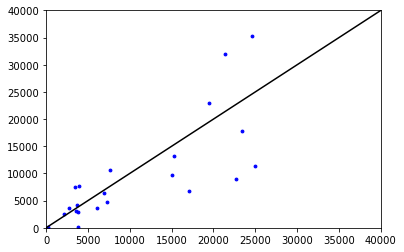

In [122]:
with open('gbr_modelName_nt100_n17', 'rb') as f:
        rf = pickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print('Predicted data r2 =', rf.score(xdata2, ydata))
print('MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f'))
print('RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f'))
print('explained_var =',format(explained_variance_score(ydata, predicted),  '.3f'))
print('bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f'))
print('n =' , len(ydata))


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=8, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,40000]
y = [-1,40000]

#sets the limits of the axis
plt.xlim(-1, 40000)
plt.ylim(-1, 40000)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_78.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelName_mKath', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation_l57.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel57', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validationgtr4m.png',dpi=600)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# data to plot
x = predicted
y = ydata

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=0.5, edgecolor='')

# data for the 1 for 1 line
a = [-1,30]
b = [-1,30]

#sets the limits of the axis
plt.xlim(-1,30)
plt.ylim(-1,30)
plt.ylabel('Observed mean CHM')
plt.xlabel('Predicted mean CHM')
# 1 for 1 line
ax.plot(a, b, color = 'black')

plt.show()

In [ ]:
with open('rfr_modelNamel78', 'rb') as f:
        rf = cPickle.load(f)

        predicted = rf.predict(xdata2)

#print 'r2 =' ,  rf.score(predicted, y_2)
#print 'rmse =', np.sqrt(np.mean((y_2 - predicted)**2))
#print 'n =' , len(y_2)

print 'Predicted data r2 =', rf.score(xdata2, ydata)
print 'MSE =', format(np.mean((ydata - rf.predict(xdata2))** 2), '.3f')
print 'RMSE =', format(np.sqrt(np.mean((predicted - ydata) ** 2)), '.3f')
print 'explained_var =',format(explained_variance_score(ydata, predicted),  '.3f') 
print 'bias =' , format(np.mean(ydata) - np.mean(predicted), '.3f')
print 'n =' , len(ydata)


# plot up predicted and observed data 
plt.scatter(predicted, ydata,s=0.002, c='b', marker='o')

# data for the 1 for 1 line
x = [-1,30]
y = [-1,30]

#sets the limits of the axis
plt.xlim(-1, 30)
plt.ylim(-1, 30)

# 1 for 1 line

fig = plt.figure(1)
plt.plot(x, y, color = 'black')
fig.savefig('predicted_Observed_Validation.png',dpi=600)
plt.show()